In [ ]:
%cd 'scripts'

In [43]:
from dataLoaderCdiff import *
import scipy.stats as st
from collections import Counter
from ml_methods import *
import sklearn
import torch
from matplotlib import cm
import scipy
import  itertools
from datetime import datetime

from seaborn import clustermap
from scipy.cluster.hierarchy import linkage
from sklearn.linear_model import LogisticRegression
import os
import time
import pickle as pkl
import pubchempy as pcp
import pandas as pd
from dataLoader import *
from statsmodels.stats.multitest import multipletests


In [7]:
dl = dataLoader(pt_perc = {'metabs': .25, '16s': .05, 'scfa': 0, 'toxin':0}, meas_thresh = 
                {'metabs': 0, '16s': 10, 'scfa': 0, 'toxin':0}, 
                var_perc = {'metabs': 15, '16s': 5, 'scfa': 0, 'toxin':0})

# Q-Q plot

In [77]:
metabs = dl.keys['metabs']['filtered_data']
met_y = dl.keys['metabs']['targets']
met_y_tmpts = np.array([x.split('-')[1] for x in metabs.index.values])


counts = dl.keys['16s']['data']
proportions = pd.DataFrame(np.divide(counts.T, np.sum(counts, 1)).T, index = counts.index.values, \
                          columns = counts.columns.values)
prop_y = dl.keys['16s']['targets']
prob_y_tmpts = np.array([x.split('-')[1] for x in proportions.index.values])

scfas = dl.keys['scfa']['filtered_data']
scfa_y = dl.keys['scfa']['targets']
scfa_y_tmpts  = np.array([x.split('-')[1] for x in scfas.index.values])

In [20]:
import statsmodels.graphics.gofplots as sm

In [101]:
from scipy.stats import shapiro
for key in dl.week.keys():
    print(key)
    for week in dl.week[key].keys():
        dat = dl.week[key][week]['x']
        ps = []
        print('Week ' + str(week))
        for met in metabs_std.columns.values:
            stat, p = shapiro(metabs_std[met])
            ps.append(p)
            if p>.05:
                print(met)
        print('')

metabs
Week 0
(16 or 17)-methylstearate (a19:0 or i19:0)
2-hydroxy-4-(methylthio)butanoic acid
2-hydroxyarachidate*
2-hydroxybehenate
3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)
3-methylhistidine
alpha-ketoglutaramate*
arachidate (20:0)
arachidonate (20:4n6)
dihomolinolenate (20:3n3 or 3n6)
docosadienoate (22:2n6)
erucate (22:1n9)
formiminoglutamate
fumarate
glutamate
glycylisoleucine
inosine
leucine
margarate (17:0)
methionine sulfoxide
myristate (14:0)
N-acetylmethionine
N-acetylproline
N-acetylvaline
N-alpha-acetylornithine
N-formylmethionine
N-palmitoyl-sphingosine (d18:1/16:0)
ornithine
palmitoleate (16:1n7)
stearoyl ethanolamide
sulfate*
thymine
trimethylamine N-oxide
valine

Week 1
(16 or 17)-methylstearate (a19:0 or i19:0)
2-hydroxy-4-(methylthio)butanoic acid
2-hydroxyarachidate*
2-hydroxybehenate
3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)
3-methylhistidine
alpha-ketoglutaramate*
arachidate (20:0)
arachidonate (20:4n6)
dihomolinolenate (20:3n3 or 3n6)


sulfate*
thymine
trimethylamine N-oxide
valine

Week 1.5
(16 or 17)-methylstearate (a19:0 or i19:0)
2-hydroxy-4-(methylthio)butanoic acid
2-hydroxyarachidate*
2-hydroxybehenate
3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)
3-methylhistidine
alpha-ketoglutaramate*
arachidate (20:0)
arachidonate (20:4n6)
dihomolinolenate (20:3n3 or 3n6)
docosadienoate (22:2n6)
erucate (22:1n9)
formiminoglutamate
fumarate
glutamate
glycylisoleucine
inosine
leucine
margarate (17:0)
methionine sulfoxide
myristate (14:0)
N-acetylmethionine
N-acetylproline
N-acetylvaline
N-alpha-acetylornithine
N-formylmethionine
N-palmitoyl-sphingosine (d18:1/16:0)
ornithine
palmitoleate (16:1n7)
stearoyl ethanolamide
sulfate*
thymine
trimethylamine N-oxide
valine

Week 2
(16 or 17)-methylstearate (a19:0 or i19:0)
2-hydroxy-4-(methylthio)butanoic acid
2-hydroxyarachidate*
2-hydroxybehenate
3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)
3-methylhistidine
alpha-ketoglutaramate*
arachidate (20:0)
arachidonate

In [97]:
reject, corr_p, aS, aBF = multipletests(ps, alpha = 0.05, method = 'fdr_bh')

In [98]:
metabs_std.columns.values[reject==False]

array(['(16 or 17)-methylstearate (a19:0 or i19:0)',
       '1-oleoylglycerol (18:1)', '2-hydroxy-4-(methylthio)butanoic acid',
       '2-hydroxyarachidate*', '2-hydroxybehenate',
       '3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)',
       '3-methylhistidine', 'alpha-ketoglutaramate*', 'arachidate (20:0)',
       'arachidonate (20:4n6)', 'dihomolinolenate (20:3n3 or 3n6)',
       'docosadienoate (22:2n6)', 'erucate (22:1n9)',
       'formiminoglutamate', 'fumarate', 'glutamate', 'glycylisoleucine',
       'inosine', 'leucine', 'margarate (17:0)', 'methionine sulfoxide',
       'myristate (14:0)', 'N-acetylleucine', 'N-acetylmethionine',
       'N-acetylproline', 'N-acetylvaline', 'N-alpha-acetylornithine',
       'N-formylmethionine', 'N-palmitoyl-sphingosine (d18:1/16:0)',
       'ornithine', 'palmitoleate (16:1n7)', 'stearoyl ethanolamide',
       'sulfate*', 'thymine', 'trimethylamine N-oxide', 'valine'],
      dtype=object)

In [99]:
metabs_std.columns.values[np.array(ps)>=aBF]

array(['(16 or 17)-methylstearate (a19:0 or i19:0)',
       '1-linoleoylglycerol (18:2)', '1-oleoylglycerol (18:1)',
       '2-hydroxy-4-(methylthio)butanoic acid', '2-hydroxyarachidate*',
       '2-hydroxybehenate', '2-hydroxybutyrate/2-hydroxyisobutyrate',
       '3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)',
       '3-formylindole', '3-methylhistidine', '4-guanidinobutanoate',
       'alpha-ketoglutaramate*', 'arachidate (20:0)',
       'arachidonate (20:4n6)', 'arginine', 'azelate (C9-DC)', 'cysteine',
       'dihomolinolenate (20:3n3 or 3n6)', 'docosadienoate (22:2n6)',
       'erucate (22:1n9)', 'formiminoglutamate', 'fructosyllysine',
       'fumarate', 'glutamate', 'glycylisoleucine',
       'hexadecadienoate (16:2n6)', 'hydantoin-5-propionate', 'inosine',
       'leucine', 'lysine', 'margarate (17:0)', 'methionine sulfoxide',
       'myristate (14:0)', 'N-acetylglutamine', 'N-acetylglycine',
       'N-acetylleucine', 'N-acetylmethionine', 'N-acetylmuramate',
      

In [58]:
sum(np.array(ps) >=aBF)

61

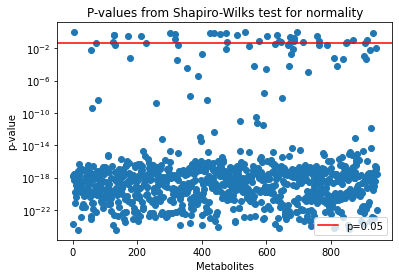

In [59]:
plt.scatter(np.arange(len(ps)), ps)
v = plt.axhline(y = 0.05, c='r')
plt.xlabel('Metabolites')
plt.ylabel('p-value')
plt.yscale('log')
plt.title('P-values from Shapiro-Wilks test for normality')
plt.legend([v], ['p=0.05'], loc = 4)

In [80]:
ps = []
for met in scfas.columns.values:
    stat, p = shapiro(scfas[met])
    ps.append(p)

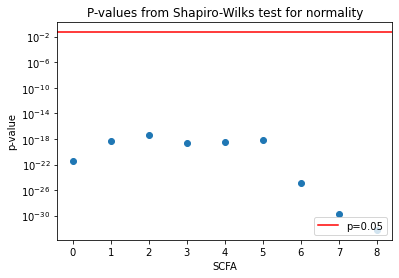

In [81]:
plt.scatter(np.arange(len(ps)), ps)
v = plt.axhline(y = 0.05, c='r')
plt.xlabel('SCFA')
plt.ylabel('p-value')
plt.yscale('log')
plt.title('P-values from Shapiro-Wilks test for normality')
plt.legend([v], ['p=0.05'], loc = 4)

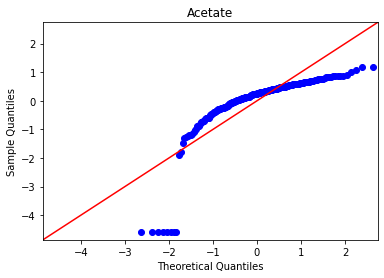

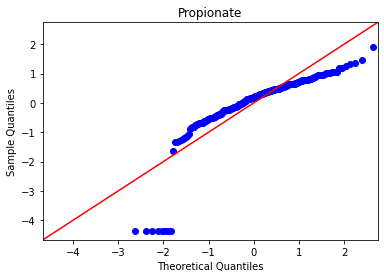

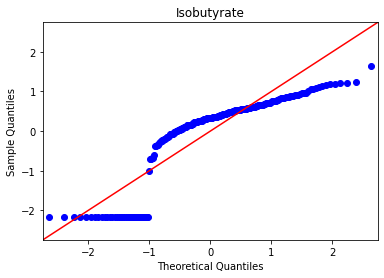

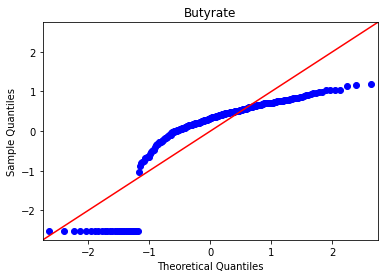

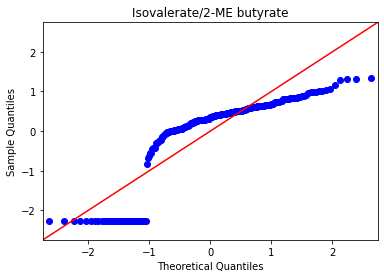

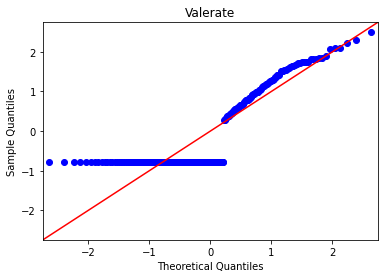

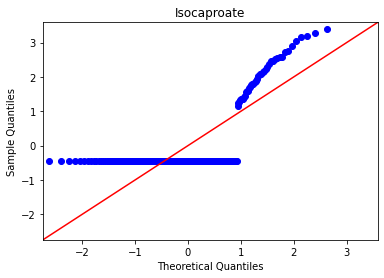

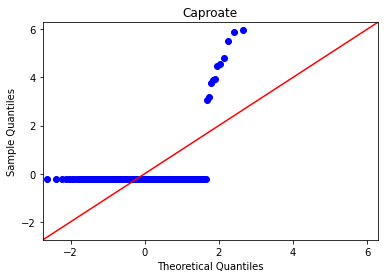

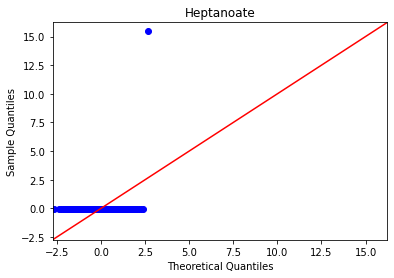

In [82]:
for scfa in scfas.columns.values:
    fig = sm.qqplot(scfas[scfa], line = '45')
    plt.title(scfa)
plt.show()

In [87]:
sum(scfa_raw.Heptanoate>0)

1

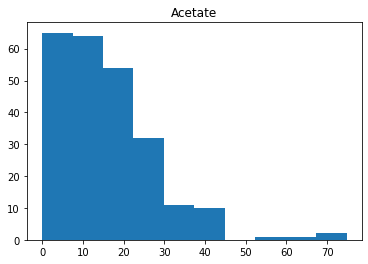

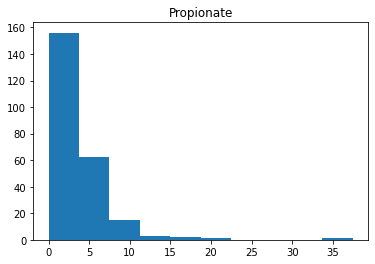

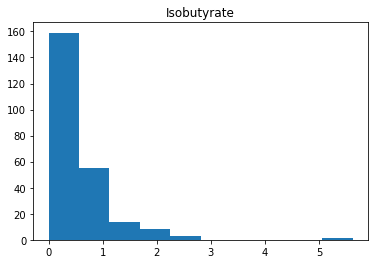

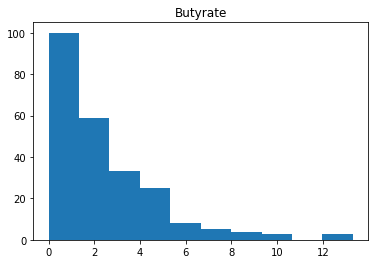

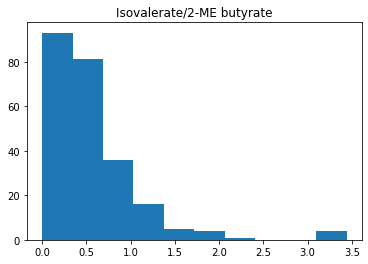

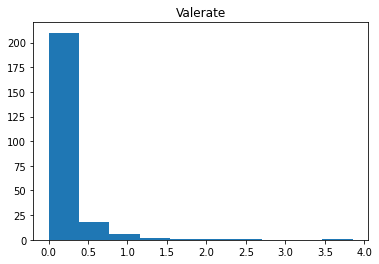

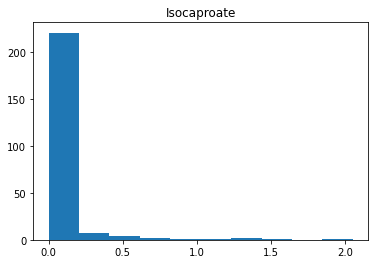

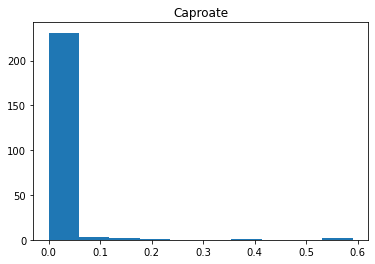

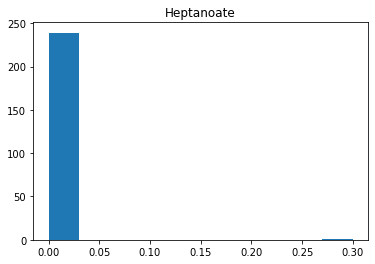

In [74]:
scfa_raw = dl.keys['scfa']['data']
for scfa in scfa_raw.columns.values:
    plt.hist(scfa_raw[scfa])
    plt.title(scfa)
    plt.show()

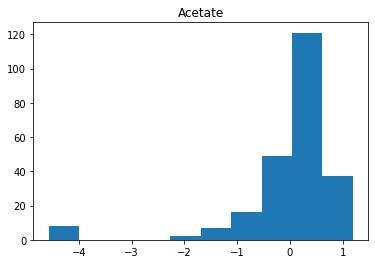

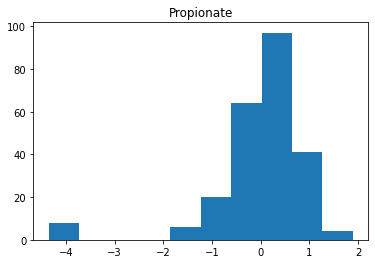

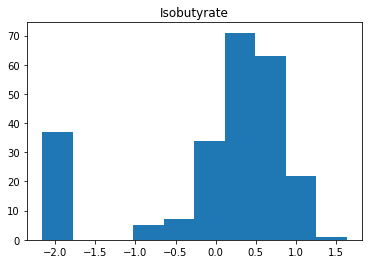

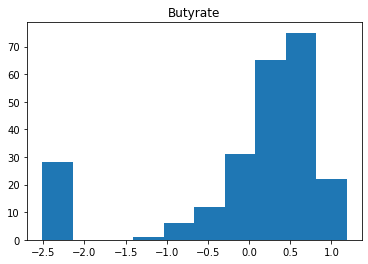

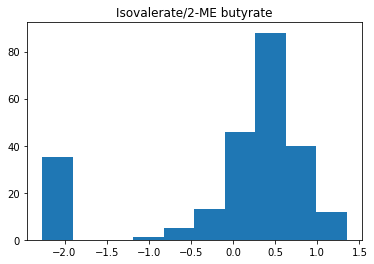

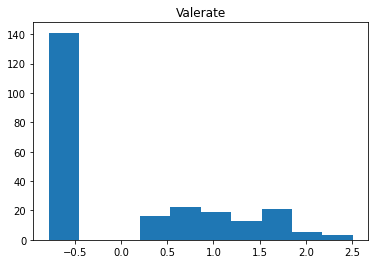

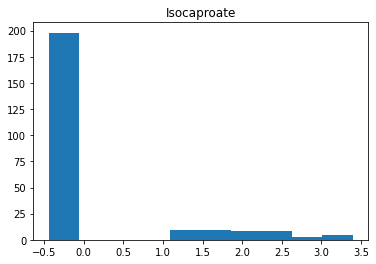

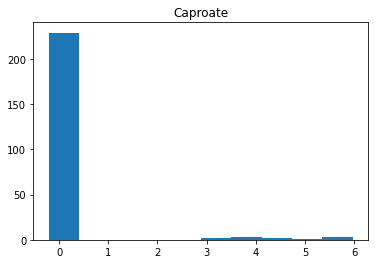

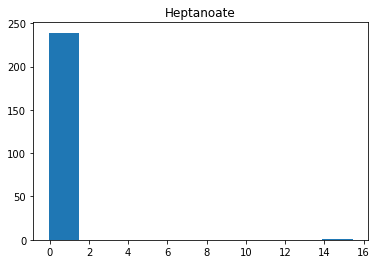

In [85]:
for scfa in scfas.columns.values:
    plt.hist(scfas[scfa])
    plt.title(scfa)
    plt.show()

In [18]:
temp = pd.read_csv('outputs/SigBiomarkers/SigBiomarkersweek_one_metabs_2021-03-01.csv', index_col = 0)
sig_feats = temp.index.values[:5]

In [36]:
dat_filt = dl.keys['metabs']['filtered_data']
dat = dl.keys['metabs']['data']

mets = np.zeros(dat.shape)
mets[dat > 0] = 1
counts_all = np.sum(mets,0)
keeps = np.where(counts_all >= (dat.shape[0]-5))[0]

met_keeps = dat.columns.values[keeps]
met_filtered = dat_filt.columns.values
mets_nzeros = list(set(met_keeps).intersection(set(met_filtered)))

/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/jendawk/miniconda3/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

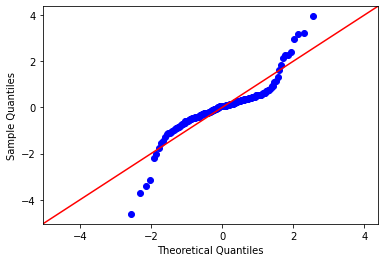

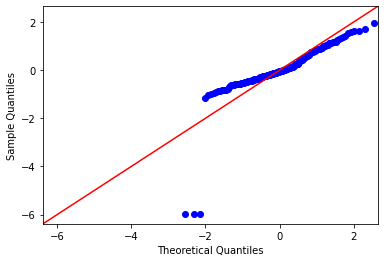

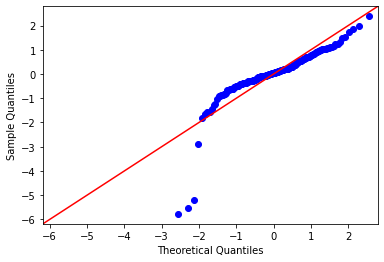

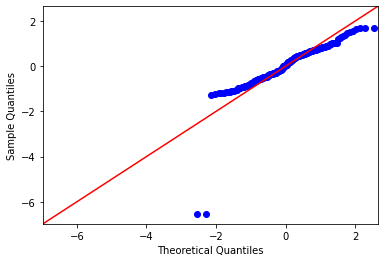

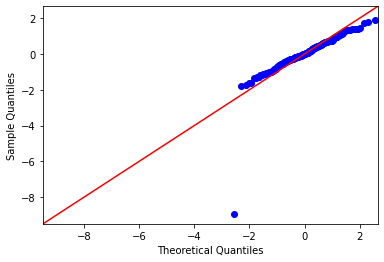

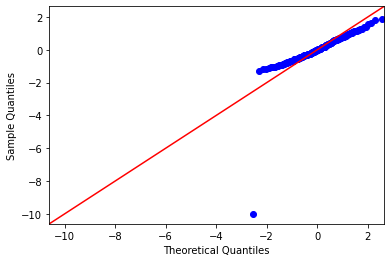

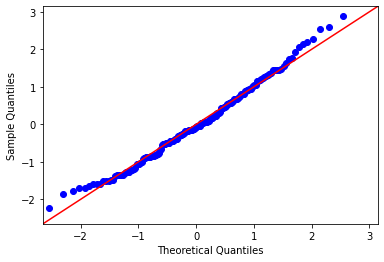

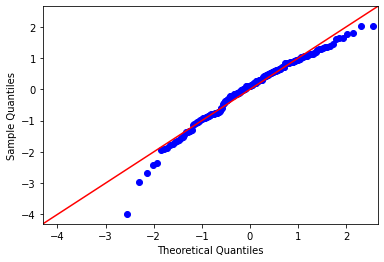

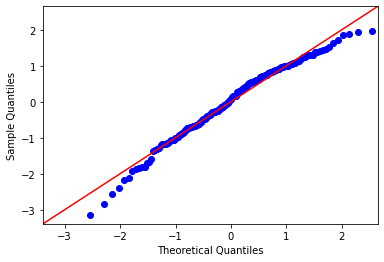

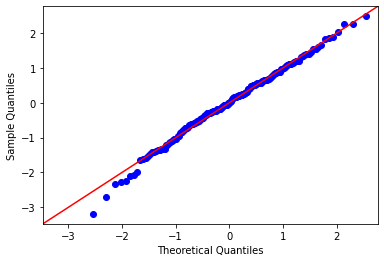

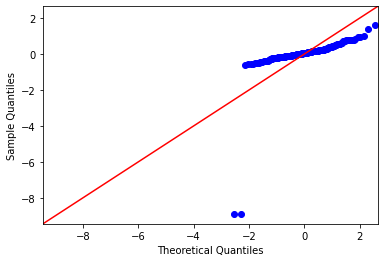

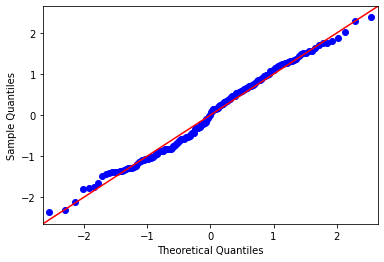

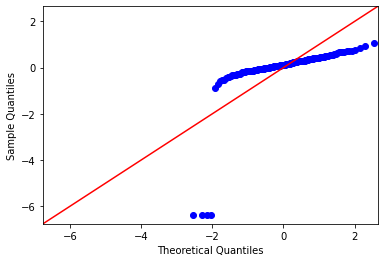

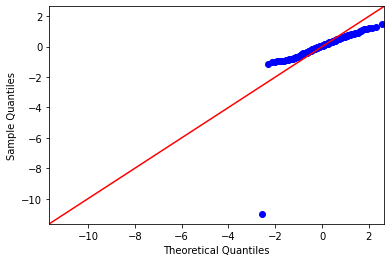

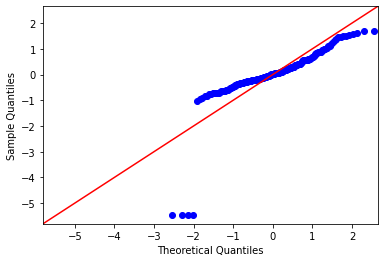

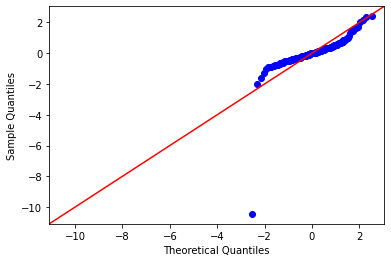

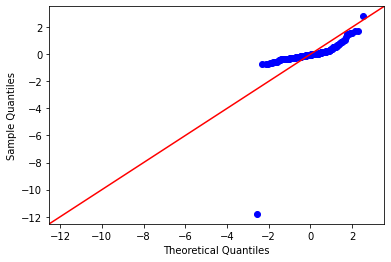

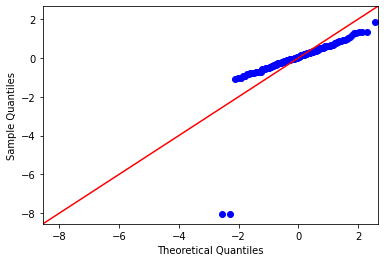

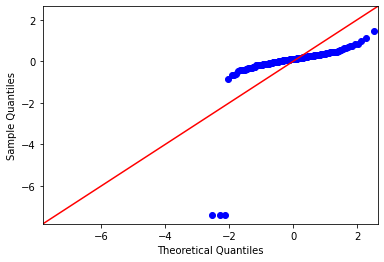

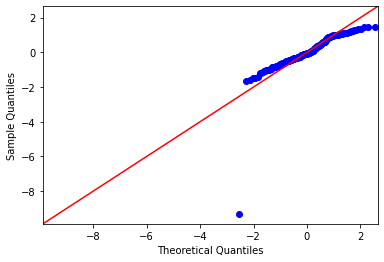

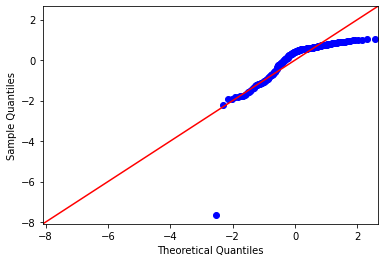

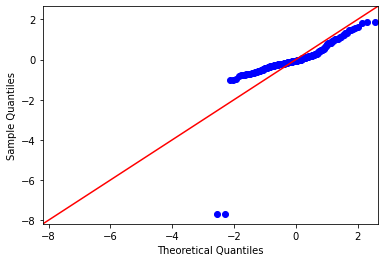

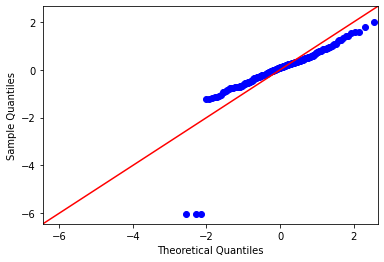

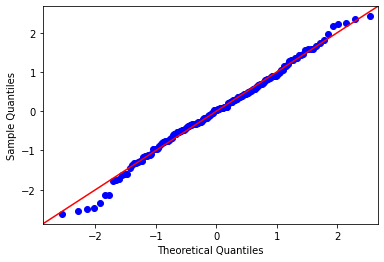

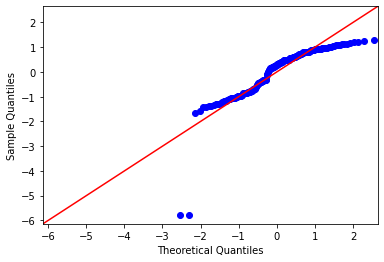

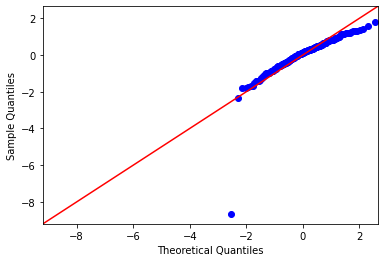

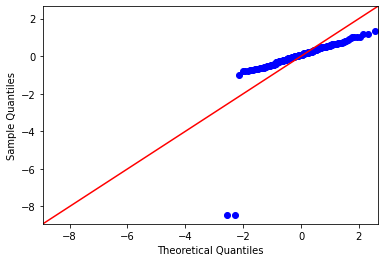

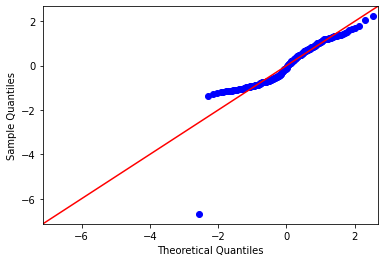

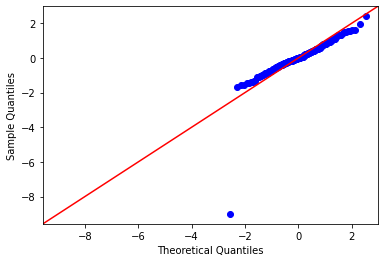

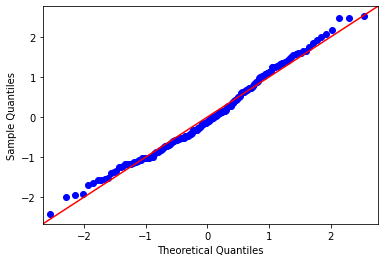

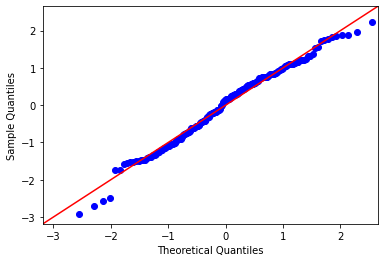

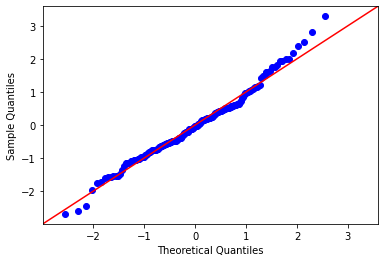

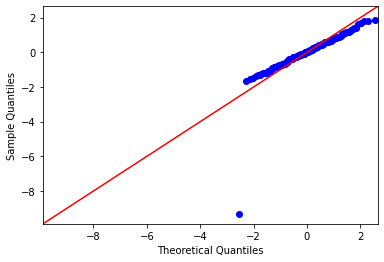

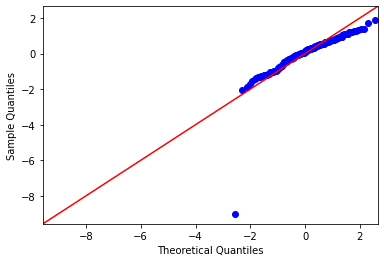

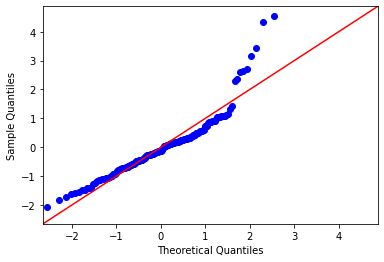

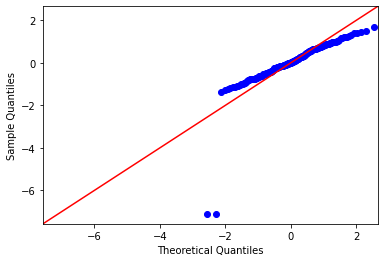

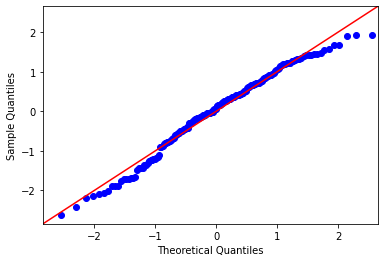

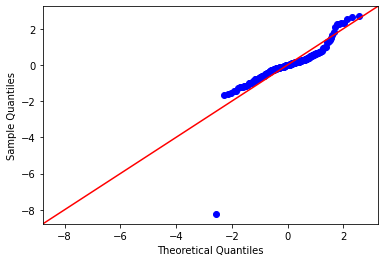

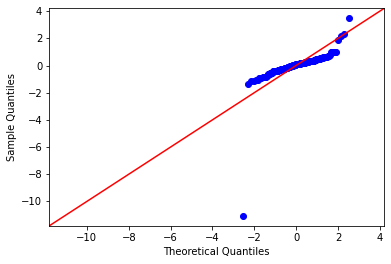

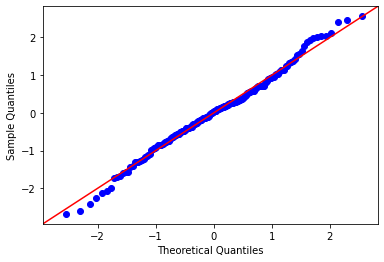

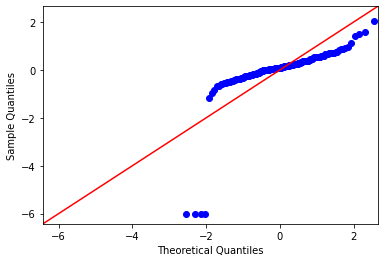

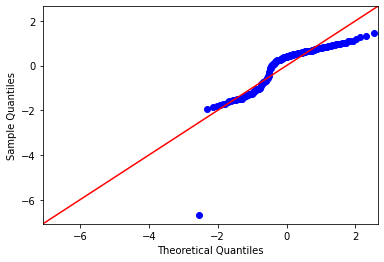

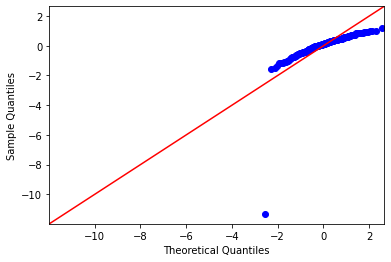

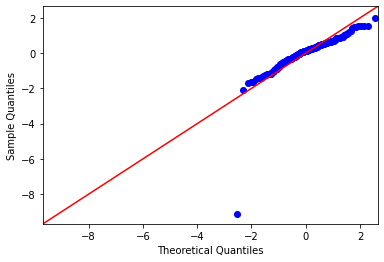

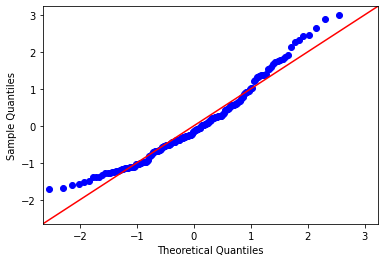

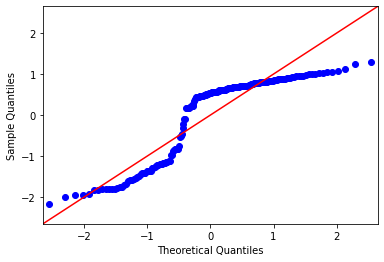

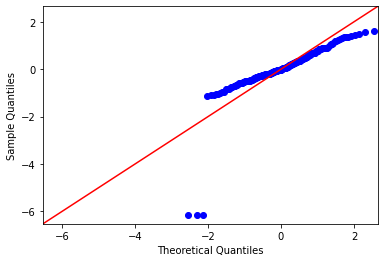

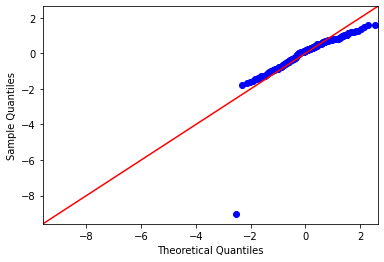

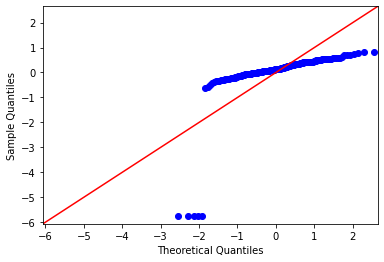

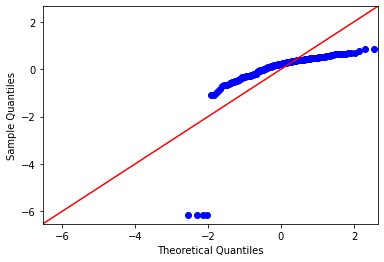

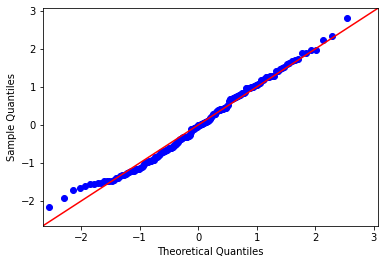

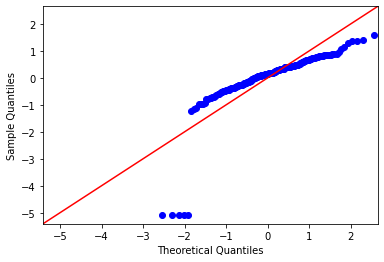

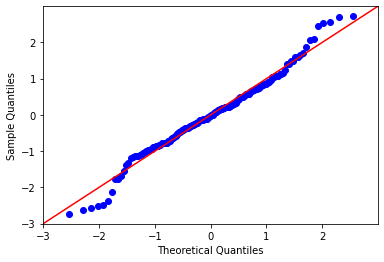

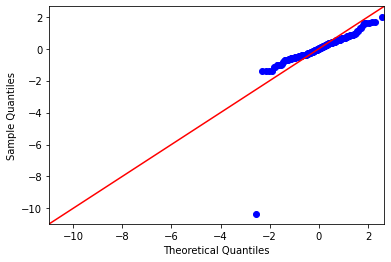

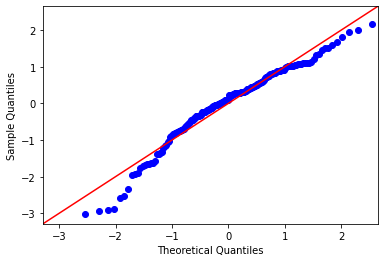

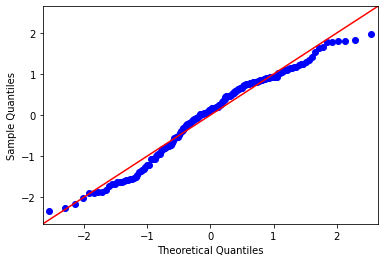

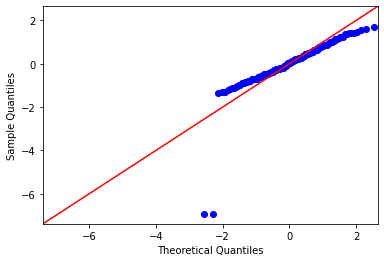

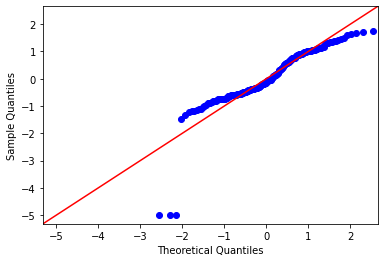

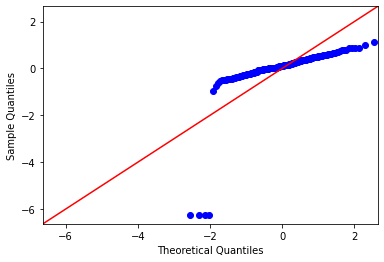

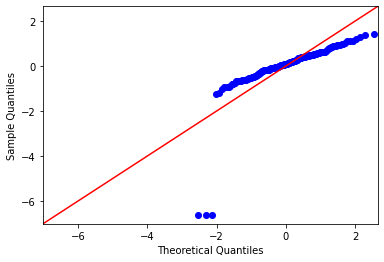

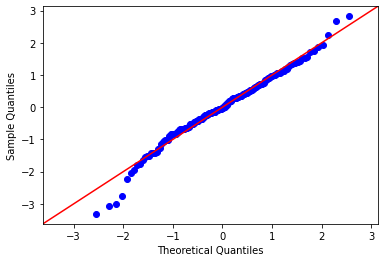

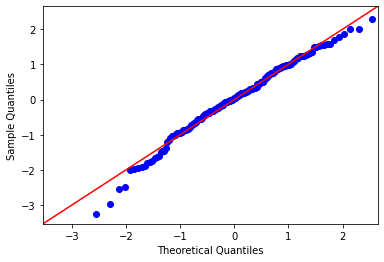

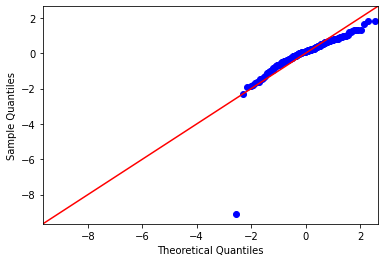

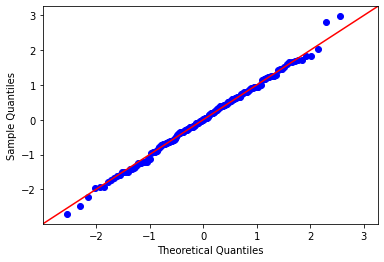

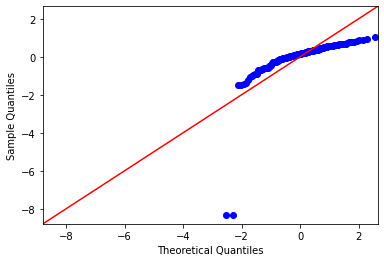

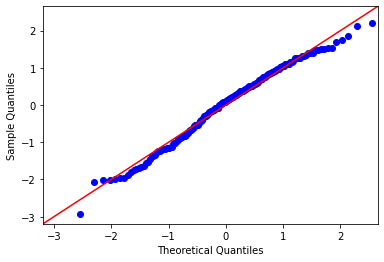

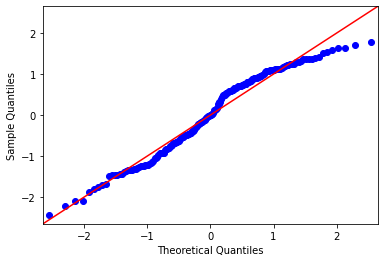

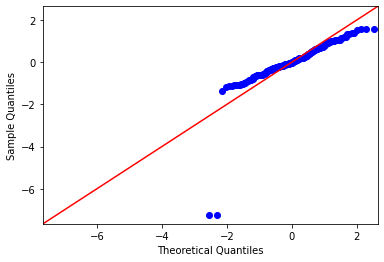

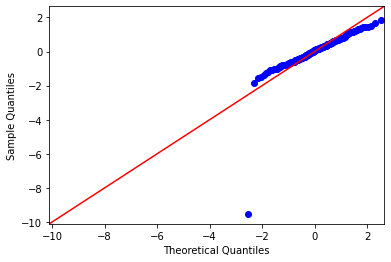

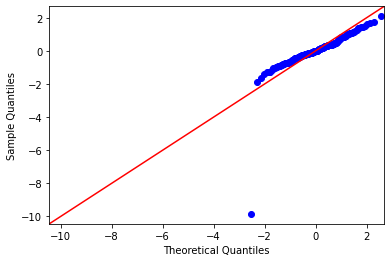

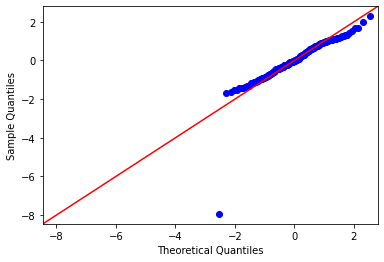

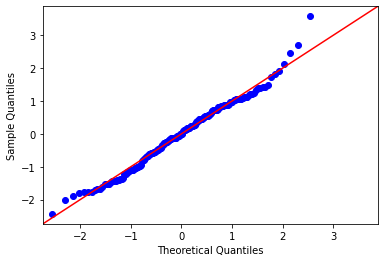

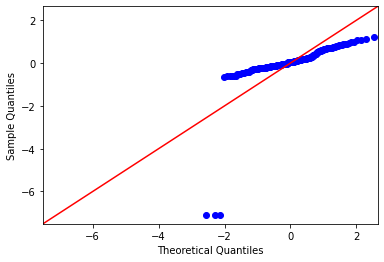

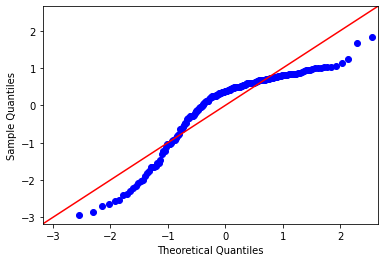

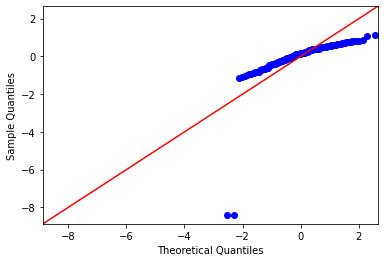

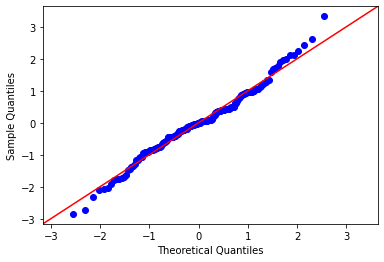

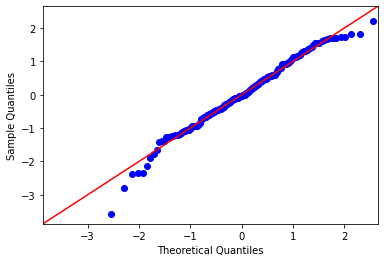

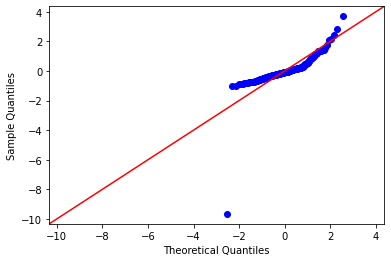

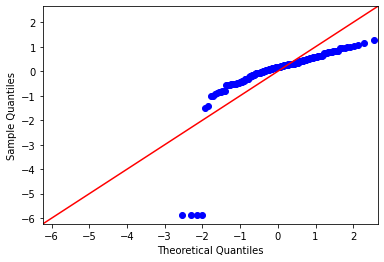

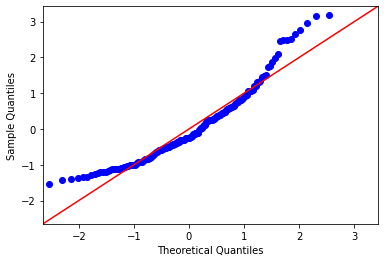

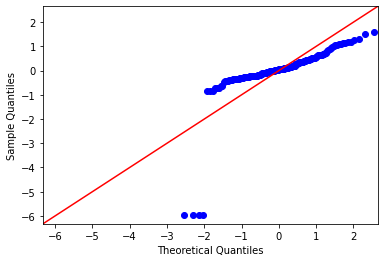

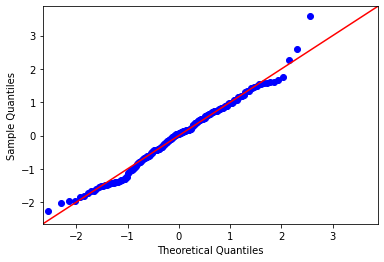

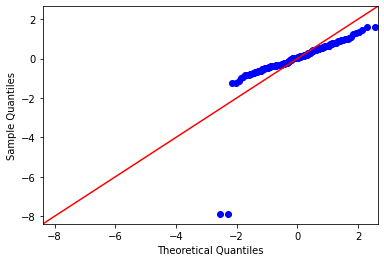

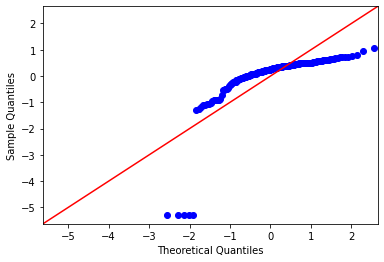

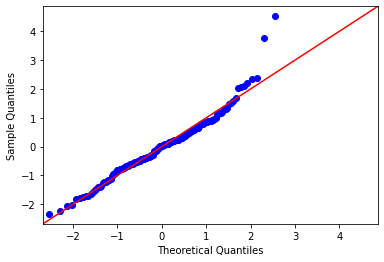

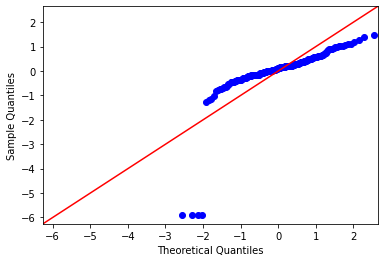

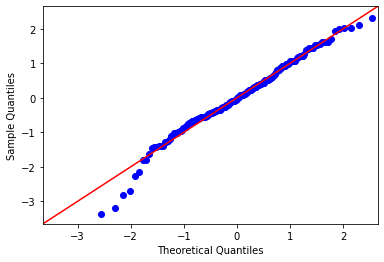

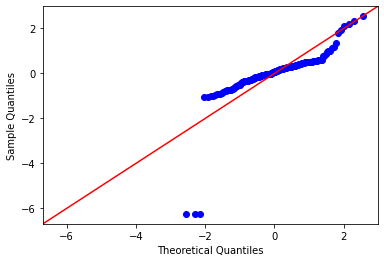

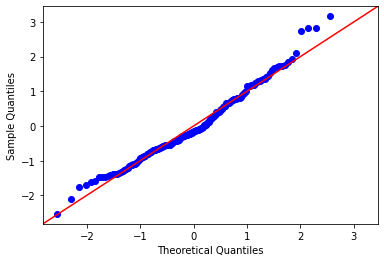

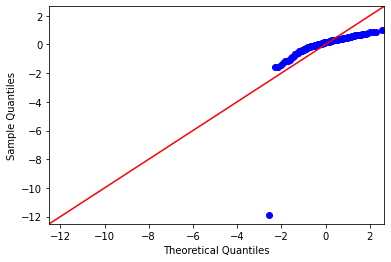

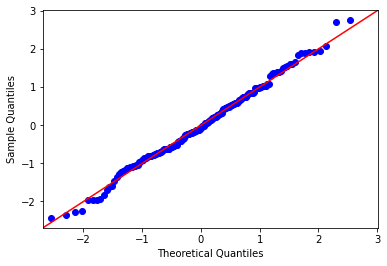

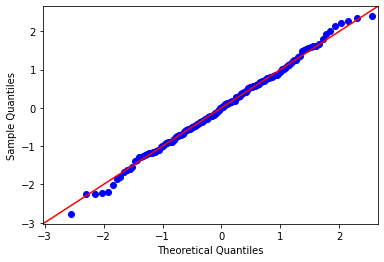

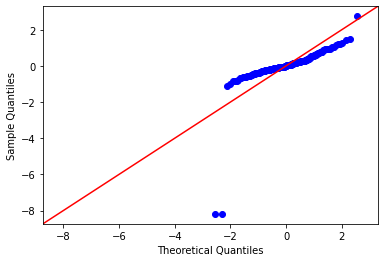

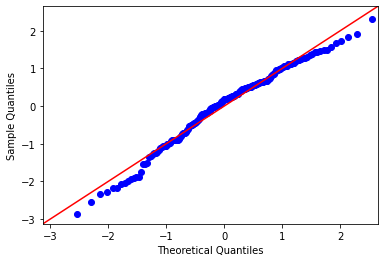

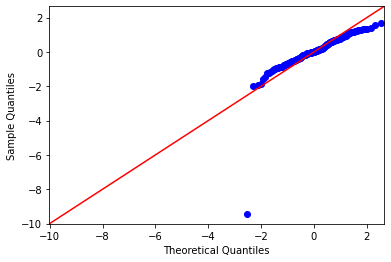

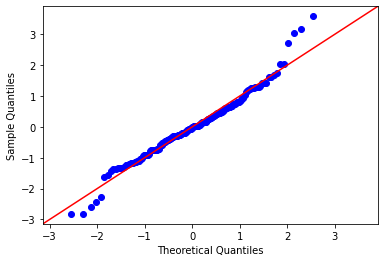

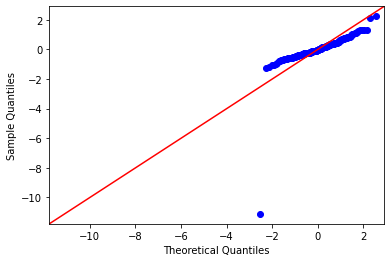

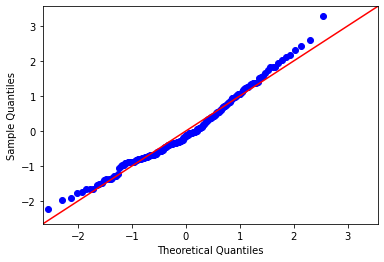

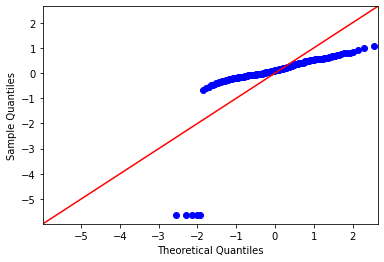

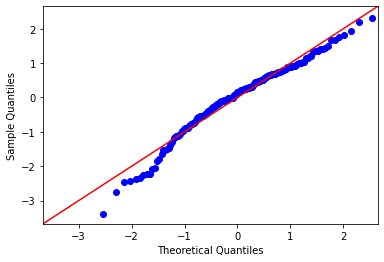

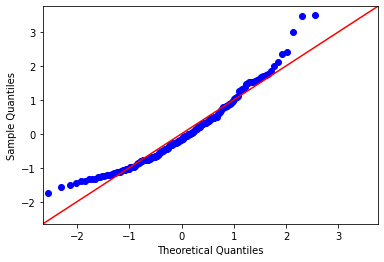

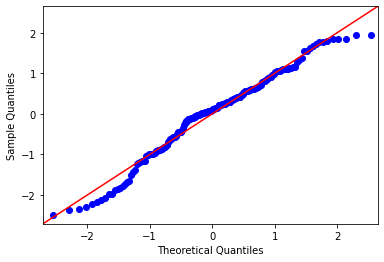

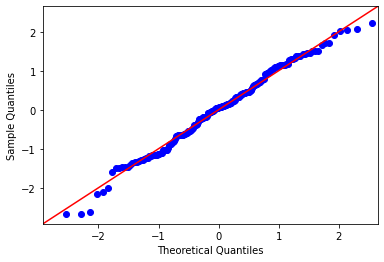

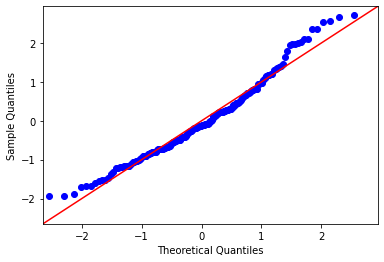

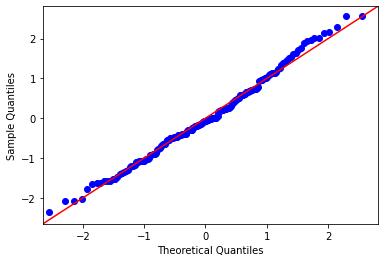

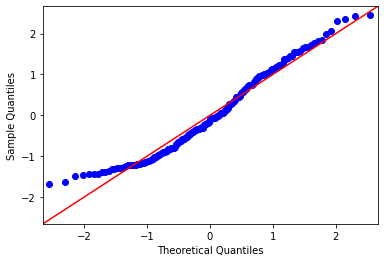

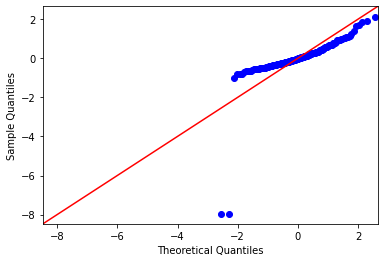

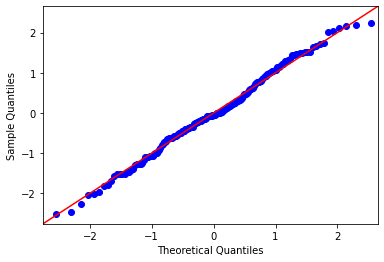

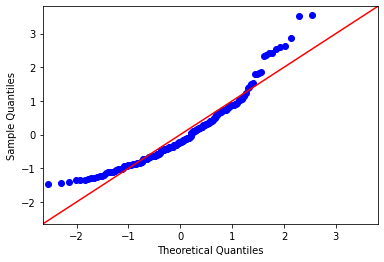

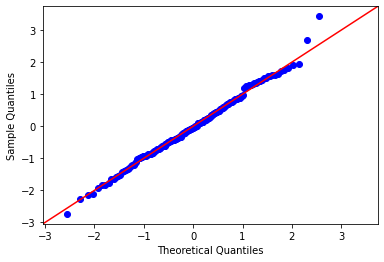

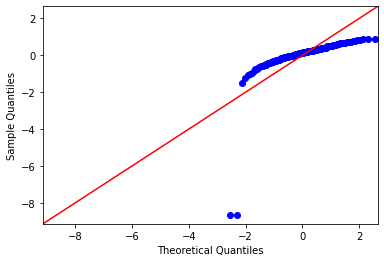

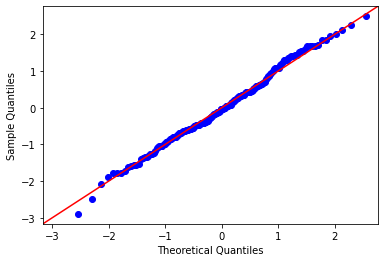

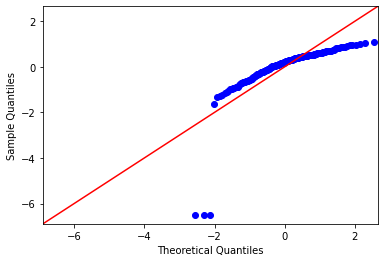

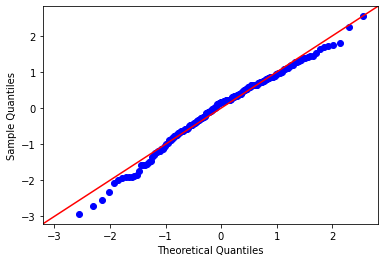

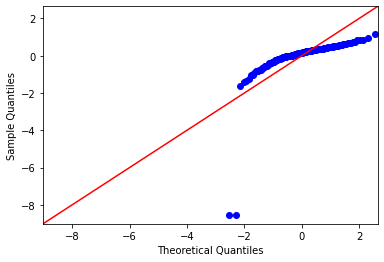

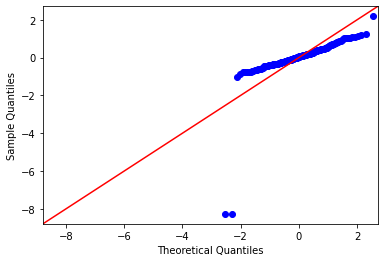

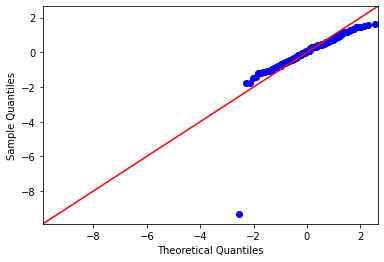

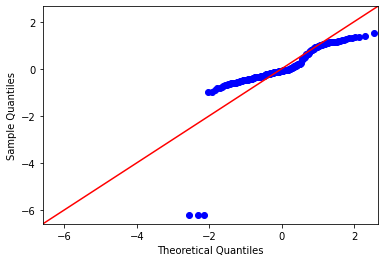

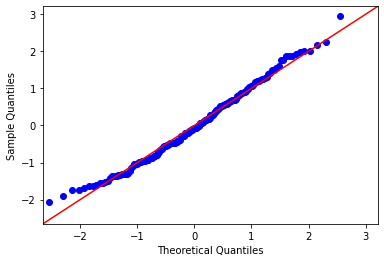

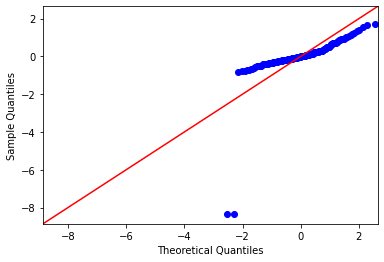

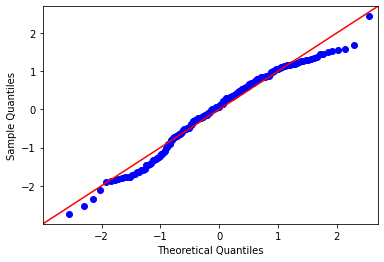

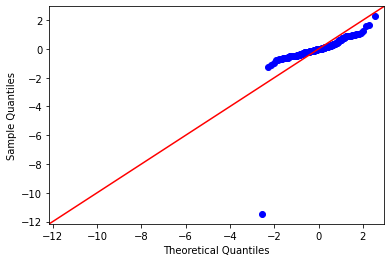

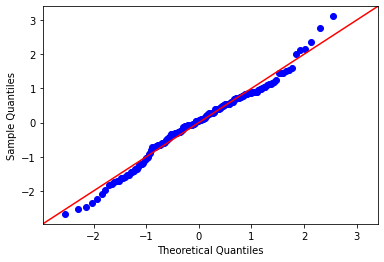

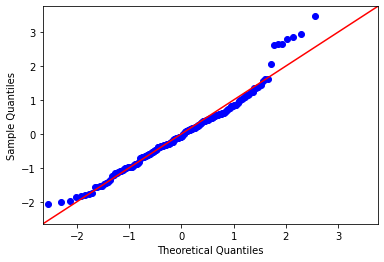

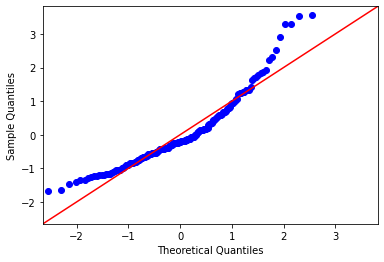

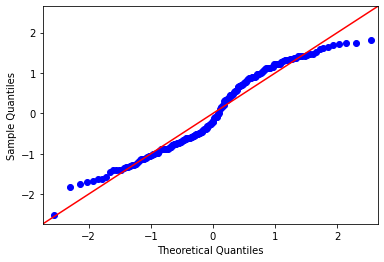

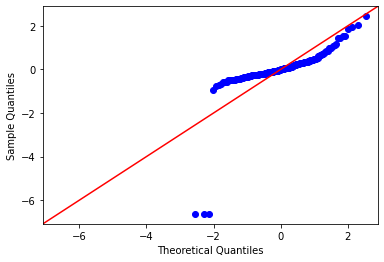

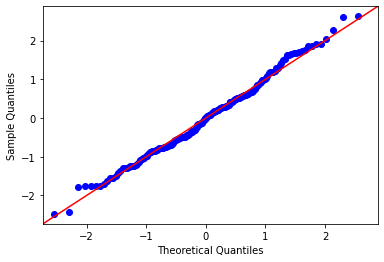

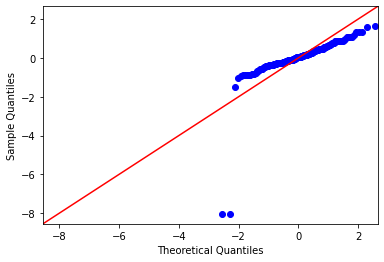

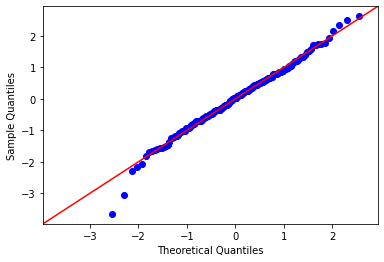

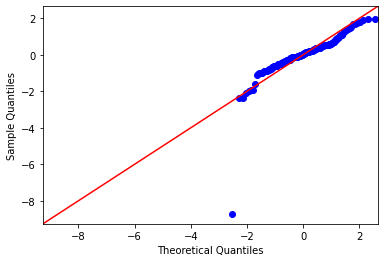

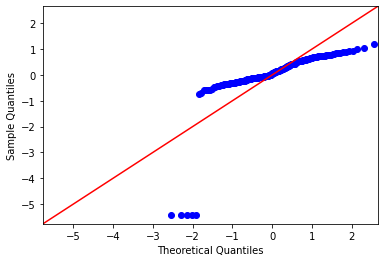

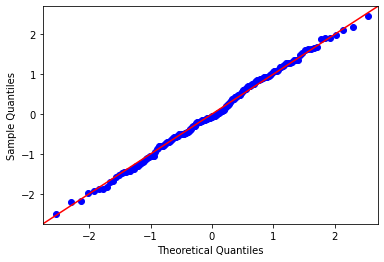

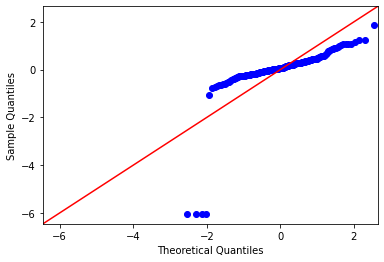

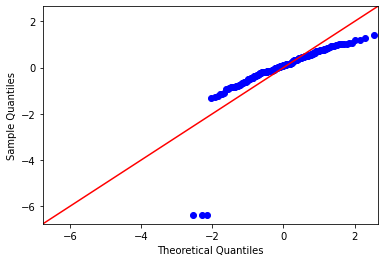

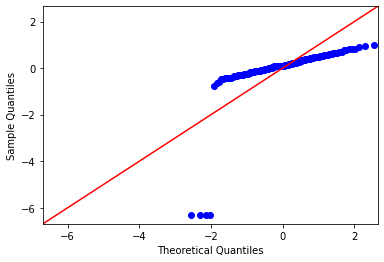

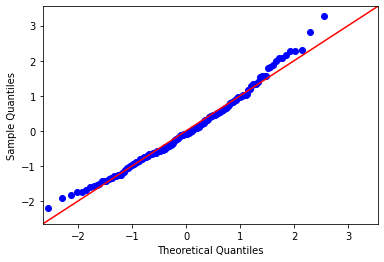

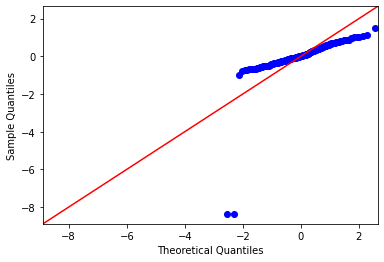

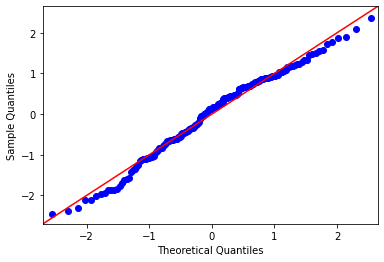

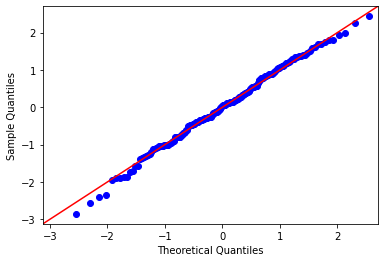

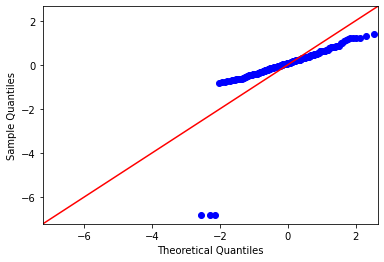

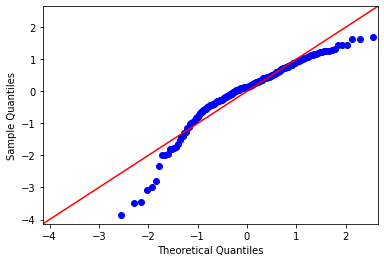

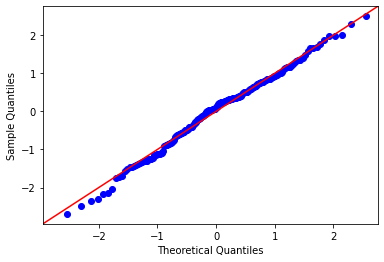

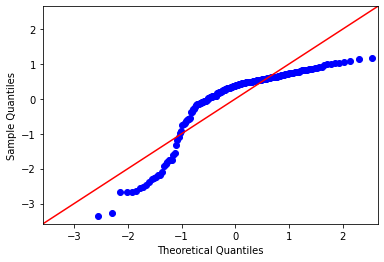

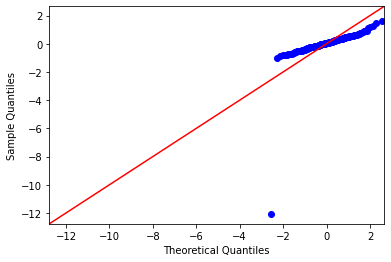

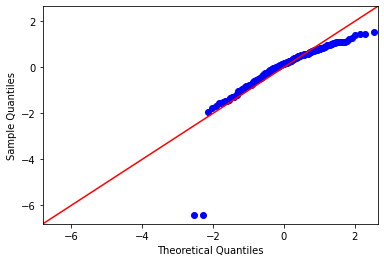

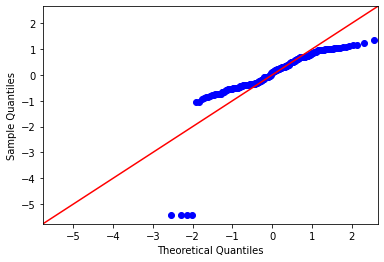

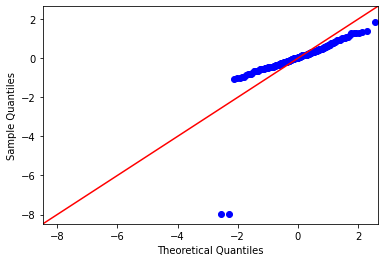

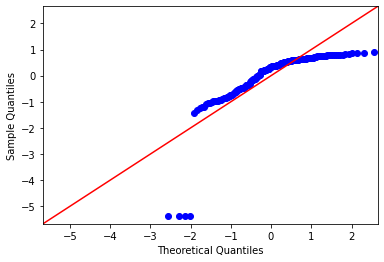

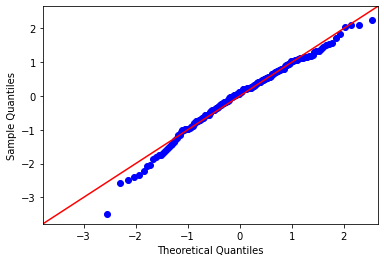

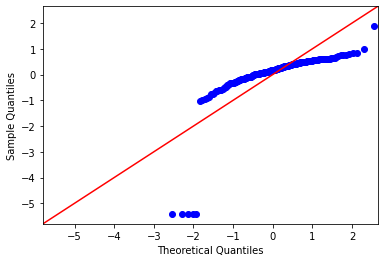

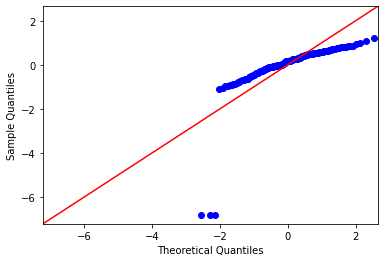

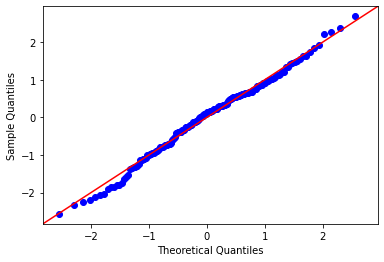

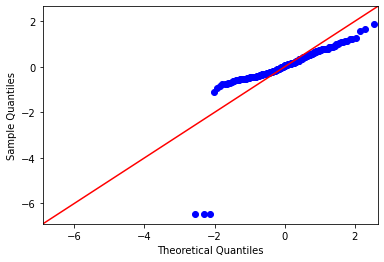

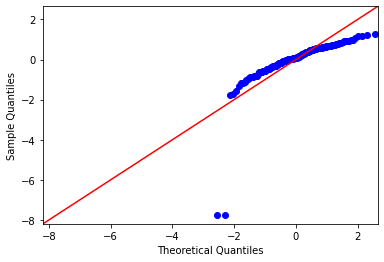

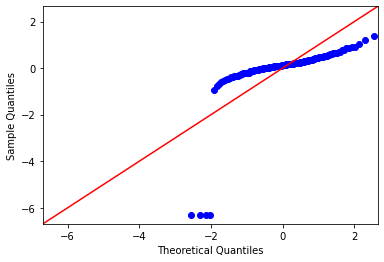

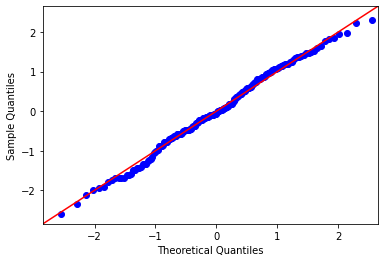

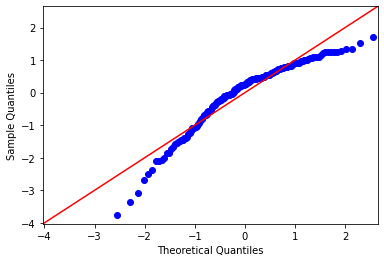

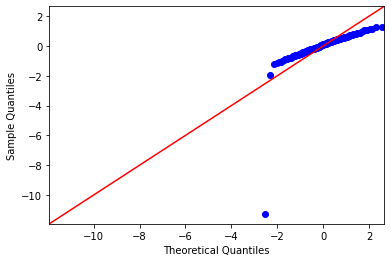

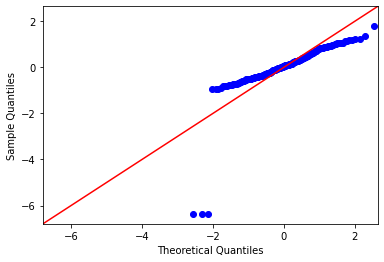

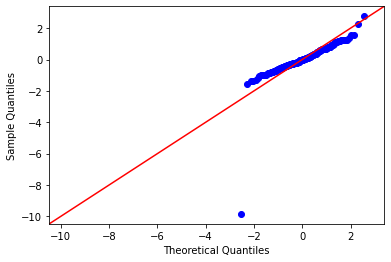

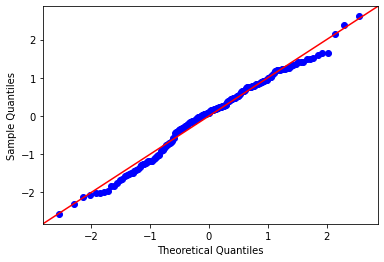

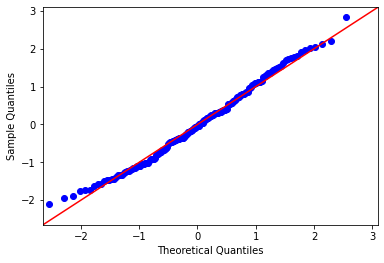

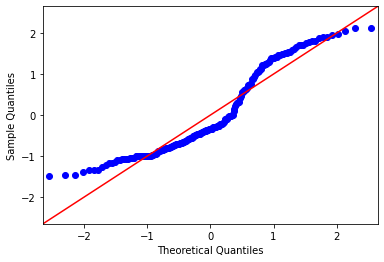

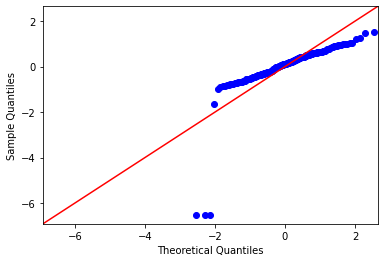

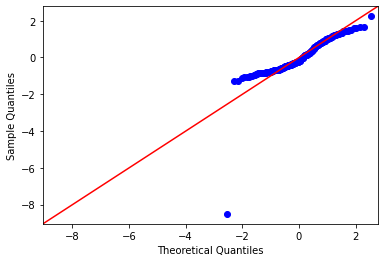

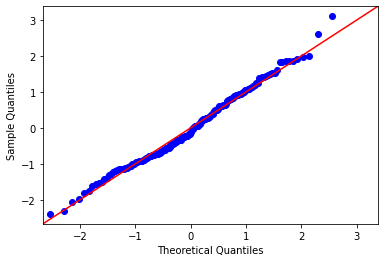

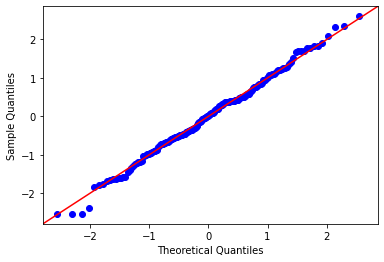

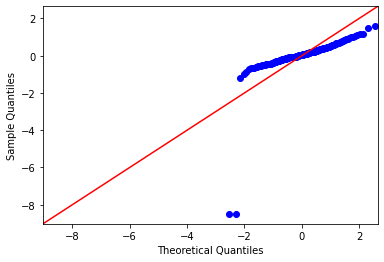

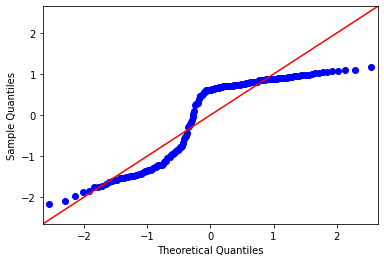

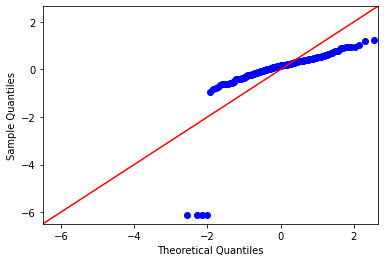

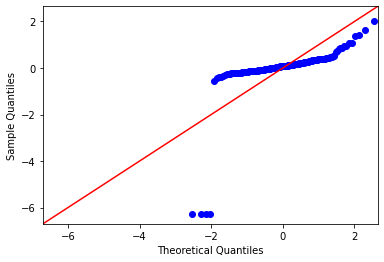

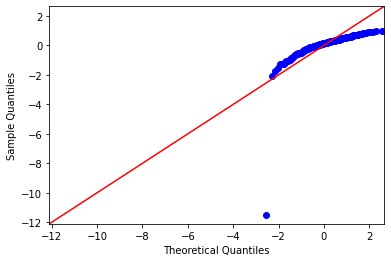

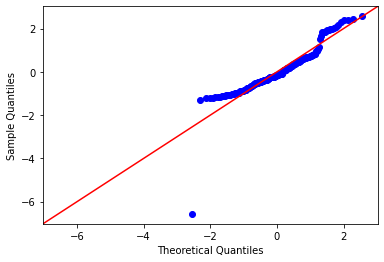

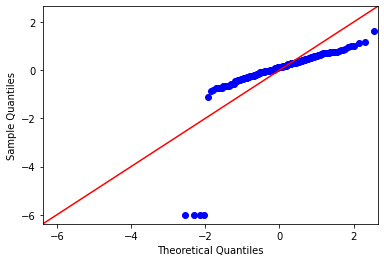

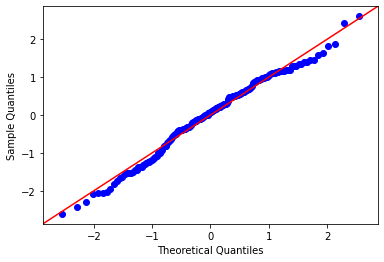

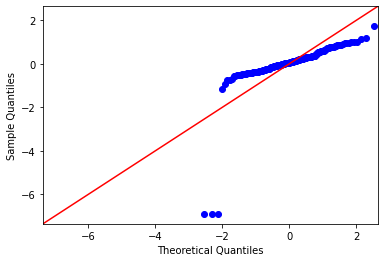

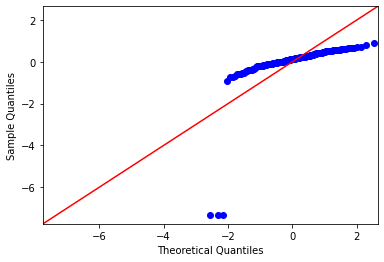

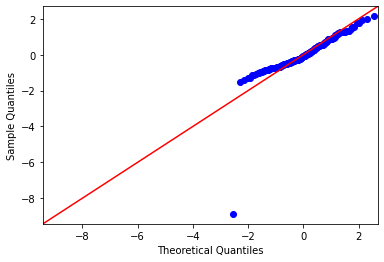

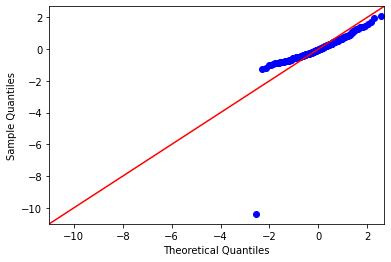

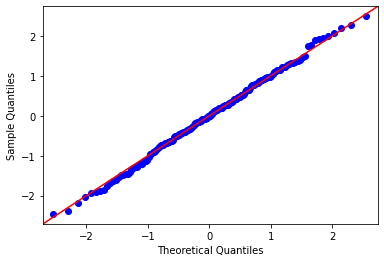

In [37]:
metabs_std = standardize(metabs, override = True)

for met in mets_nzeros:
    fig = sm.qqplot(metabs_std[met], line = '45')
plt.show()

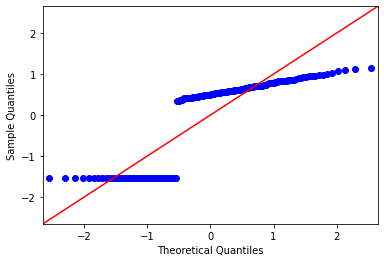

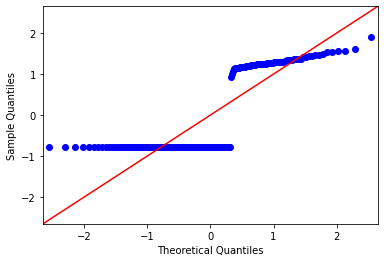

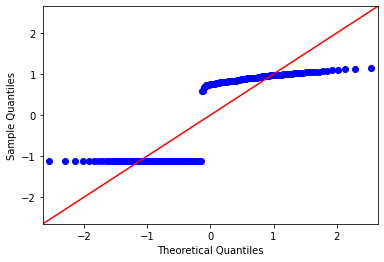

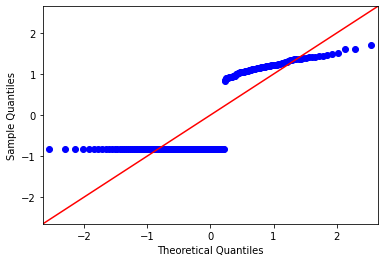

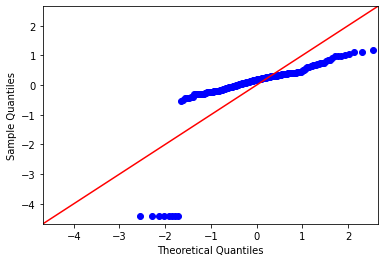

In [20]:
metabs_std = standardize(metabs, override = True)

for met in sig_feats:
    fig = sm.qqplot(metabs_std[met], line = '45')
plt.show()

In [8]:
out = 'week_one_16s/'
if not os.path.isdir(out):
    os.mkdir(out)
with open(out+'x.pkl','wb') as f:
    pickle.dump(ml.data_dict['week_one_16s'],f)
with open(out+'y.pkl','wb') as f:
    pickle.dump(ml.targets_dict['week_one_16s'],f)

In [9]:
out = 'all_data_metab/'
if not os.path.isdir(out):
    os.mkdir(out)
with open(out+'x.pkl','wb') as f:
    pickle.dump(ml.data_dict['all_data'],f)
with open(out+'y.pkl','wb') as f:
    pickle.dump(ml.targets_dict['all_data'],f)

In [10]:
out = 'all_data_16s/'
if not os.path.isdir(out):
    os.mkdir(out)
with open(out+'x.pkl','wb') as f:
    pickle.dump(ml.data_dict['all_data_16s'],f)
with open(out+'y.pkl','wb') as f:
    pickle.dump(ml.targets_dict['all_data_16s'],f)

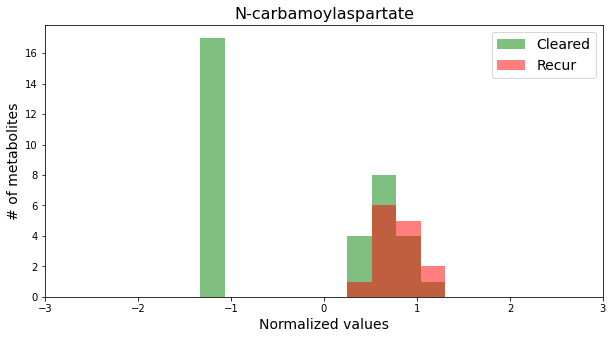

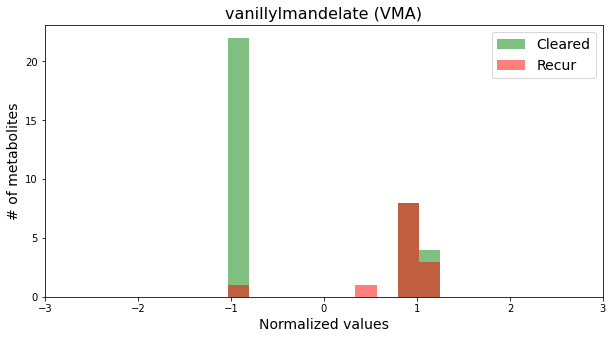

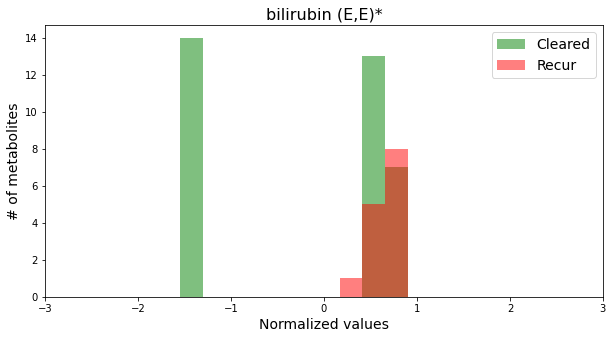

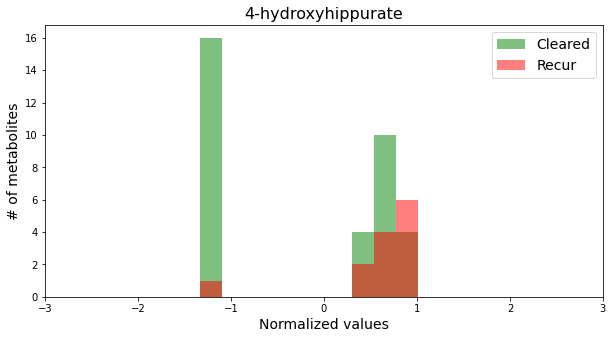

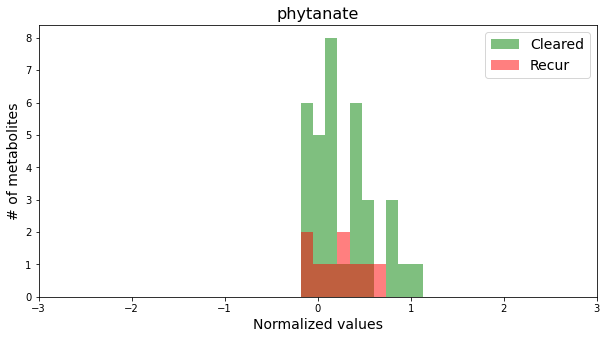

In [152]:
meds = med_df.iloc[:,ix_tot]
cl_ix = np.where((np.array(y)=='Cleared'))[0]
re_ix = np.where((np.array(y)=='Recur'))[0]
for med in meds.columns.values[:5]:
    vals = np.array(x[med])
    fig, ax = plt.subplots(figsize = (10,5))
    a = ax.hist(vals[cl_ix], color = 'g', alpha = 0.5)
    b = ax.hist(vals[re_ix], color = 'r', alpha = 0.5, bins = a[1])
    ax.legend(['Cleared','Recur'], fontsize = 14)
    ax.set_xlabel('Normalized values', fontsize = 14)
    ax.set_ylabel('# of metabolites', fontsize = 14)
    ax.set_title(med, fontsize = 16)
    ax.set_xlim([-3,3])
    

# Get auc from double nest

In [ ]:
folds = list(final_res_dict.keys())
if len(folds)>0:
    aucs = np.concatenate([final_res_dict[seed]['metrics']['auc'] for seed in folds])
    medians = np.median(aucs,1)
    median = np.median(medians)
    mad = get_mad(median)
else:
    final_res_dict= mb.double_nest(model, x, y, name=name, dtype = 'metabolites', optim_param = 'auc', plot_lambdas=False, learn_var = 'C')
    aucs = final_res_dict['metrics']['auc']
    median = np.median(aucs)
    mad = get_mad(aucs)
    
upper, lower = get_median_ci(median, mad, 'auc')
fin_dict = {'Median AUC': median, 'MAD interval':mad}
coef_df = pd.DataFrame(fin_dict).iloc
coef_df.to_csv('outputs/bootstrapped_auc_' + str(datetime.now()).split(' ')[0] + '.csv')

# Get best lambda

In [ ]:
lambdas = [final_res_dict[seed] for seed in final_res_dict.keys()]

In [19]:
def get_ci(val,z):
    mean = np.mean(val)
    std = np.std(val)
    l = len(val)
    CI_top = mean + z*(std)/np.sqrt(l)
    CI_bot = mean - z*(std)/np.sqrt(l)
    return (CI_top, CI_bot)

In [20]:
import pickle
import numpy as np

In [21]:
path = 'preds_feb7/'
with open( path + 'final_res_dict_lr2.pkl', 'rb') as f:
    final_res_dict = pickle.load(f)

In [22]:
new_res_dict = {}
for key in final_res_dict.keys():
    new_res_dict[key.split('2020')[0]] = final_res_dict[key]

In [24]:
for key in new_res_dict.keys():
    coefs = [new_res_dict[key][x]['coef'] for x in new_res_dict[key].keys()]
    lambdas = [new_res_dict[key][x]['best_lambda'] for x in new_res_dict[key].keys()]
    mn_bl = np.mean(lambdas)
    med_bl = np.median(lambdas)
    
    aucs = [new_res_dict[key][x]['auc'] for x in new_res_dict[key].keys()]
    mn_auc = np.mean(aucs)
    print(key)
#     print('Lambda: ' + str(mn_bl))
    
#     print(lambdas)
    
    print('AUC: ' + str(mn_auc))
    print(aucs)
    print(get_ci(aucs, 1.96))
    print('')

w1_lr_l12021-02-07
AUC: 0.7462184873949579
[0.76890756302521, 0.6617647058823529, 0.76890756302521, 0.76890756302521, 0.7626050420168067]
(0.7832937778541, 0.7091431969358157)



In [19]:
path = 'predictions/preds_dec16/'
with open( path + 'final_res_dict_lr1.pkl', 'rb') as f:
    final_res_dict = pickle.load(f)

In [20]:
new_res_dict = {}
for key in final_res_dict.keys():
    new_res_dict[key.split('2020')[0]] = final_res_dict[key]

In [25]:
for key in new_res_dict.keys():
    lambdas = [new_res_dict[key][x]['best_lambda'] for x in new_res_dict[key].keys()]
    mn_bl = np.mean(lambdas)
    med_bl = np.median(lambdas)
    
    aucs = [new_res_dict[key][x]['auc'] for x in new_res_dict[key].keys()]
    mn_auc = np.mean(aucs)
    print(key)
    print(lambdas)
    print(np.mean(lambdas))
    print(get_ci(lambdas, z = 1.96))

    print('')

week_one_ALL_Reg_Data_Reg_Targets
[6.747544053110686, 6.747544053110686, 6.747544053110686, 6.747544053110686, 6.747544053110686]
6.747544053110685
(6.747544053110686, 6.747544053110684)

week_one_Reg_Data_Reg_Targets
[7.752597488629465, 7.752597488629465, 7.752597488629465, 7.752597488629465, 7.752597488629465]
7.752597488629465
(7.752597488629465, 7.752597488629465)

data_dict_16s.pkl
[0.6368249944718586, 0.6368249944718586, 0.6368249944718586, 0.6368249944718586, 0.6368249944718586]
0.6368249944718586
(0.6368249944718586, 0.6368249944718586)

data_dict_cdiff_inst.pkl
[0.00035297073027306503, 0.0004659525668664677, 0.41987070844439056, 0.41987070844439056, 0.3654383070957247]
0.24119972945632906
(0.4144095212841176, 0.0679899376285405)

data_dict_met.pkl
[7.752597488629465, 7.752597488629465, 7.752597488629465, 7.752597488629465, 7.752597488629465]
7.752597488629465
(7.752597488629465, 7.752597488629465)



In [157]:
path = 'outputs/loo_cv_all_lambdas_feb11/'
with open( path + 'final_res_dict_lr2.pkl', 'rb') as f:
    final_res_dict = pickle.load(f)
    
path = 'inputs/week_one_metabs/'
with open(path + 'w1_x.pkl','rb') as f:
    x = pkl.load(f)
with open(path + 'w1_y.pkl','rb') as f:
    y = pkl.load(f)
coef_names = x.columns.values

In [158]:
new_res_dict = {}
for key in final_res_dict.keys():
    new_res_dict[key.split('2020')[0]] = final_res_dict[key]
def get_mad(vals, axis = 0):
    return np.median(np.abs(vals - np.mean(vals, axis)), axis)

In [159]:
def get_median_ci(median, mad, param, z=1.96):
    if param == 'coef':
        upper = np.round(np.exp(median + mad),4)
        lower = np.round(np.exp(median - mad),4)
    else:
        upper = np.round(median + mad,4)
        lower  = np.round(median - mad,4)
    return upper, lower

In [160]:
def get_ci(val,z=1.96):
    mean = np.mean(val)
    std = np.std(val)
    l = len(val)
    CI_top = np.round(mean + z*(std)/np.sqrt(l),4)
    CI_bot = np.round(mean - z*(std)/np.sqrt(l),4)
    return (CI_bot, CI_top)

In [161]:
key = list(new_res_dict.keys())[0]

    # get medians across folds
med_dict = {}
stat_dict = {}
folds = np.arange(len(new_res_dict[key]))
for param in new_res_dict[key][0]:
    if param == 'model' or param == 'optimizer':
        continue
    stat_dict[param] = {}
    med_dict[param] = {}
    if isinstance(new_res_dict[key][0][param],list):
        medians = np.median(np.vstack([new_res_dict[key][fold][param] for fold in folds]),0)
        median = np.median(medians)
        mad = get_mad(medians)
        upper, lower = get_median_ci(median, mad, param)
    elif isinstance(new_res_dict[key][0][param],dict):
        arr = np.concatenate([list(new_res_dict[key][fold][param].values()) for fold in folds],1)
        medians = np.median(arr, 1)
        med_dict[param] = medians
        median = pd.Series(np.median(medians,0), index = coef_names)
        mad = pd.Series(get_mad(medians,0), index = coef_names)
        upper, lower = get_median_ci(median, mad, param)
    elif isinstance(new_res_dict[key][0][param],float):
        median = np.median([new_res_dict[key][fold][param] for fold in folds])
        mad = get_mad([new_res_dict[key][fold][param] for fold in folds])
        upper, lower = get_median_ci(median, mad, param)

    stat_dict[param]['Median'] = median
    stat_dict[param]['Mad'] = mad
    stat_dict[param]['lower_ci'] = lower
    stat_dict[param]['upper_ci'] = upper 



In [170]:
stat_dict

{'best_lambda': {'Median': 6.25055192527397,
  'Mad': 0.021572819174172864,
  'lower_ci': 6.229,
  'upper_ci': 6.2721},
 'auc': {'Median': 0.76890756302521,
  'Mad': 0.02268907563025213,
  'lower_ci': 0.7462,
  'upper_ci': 0.7916},
 'tpr': {'Median': 0.9285714285714286,
  'Mad': 0.02857142857142847,
  'lower_ci': 0.9,
  'upper_ci': 0.9571},
 'fpr': {'Median': 0.5, 'Mad': 0.0, 'lower_ci': 0.5, 'upper_ci': 0.5},
 'coef': {'Median': (12 or 13)-methylmyristate (a15:0 or i15:0)    0.0
  (14 or 15)-methylpalmitate (a17:0 or i17:0)    0.0
  (15:2)-anacardic acid                          0.0
  (15:3)-anacardic acid                          0.0
  (16 or 17)-methylstearate (a19:0 or i19:0)     0.0
                                                ... 
  vitexin                                        0.0
  xanthine                                       0.0
  xanthosine                                     0.0
  xanthurenate                                   0.0
  xylose                              

In [162]:
for param in stats_dict:
    try:
        df = pd.DataFrame(stat_dict[param])
    except:
        df = pd.DataFrame(stat_dict[param], index = [0])
    df.to_csv('outputs/'+param + '.csv')

In [163]:
path = 'inputs/week_one_metabs/'
with open(path + 'w1_x.pkl','rb') as f:
    x = pkl.load(f)
with open(path + 'w1_y.pkl','rb') as f:
    y = pkl.load(f)
coef_names = x.columns.values

In [164]:
# path = 'non_nested_feb5/'
# if not os.path.isdir(path):
#     os.mkdir(path)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

vec_data = ['Reg Data']
vec_targets = ['Reg Targets']

dattype = ['week_one']
z = 1.96

for d in dattype: 
#     dat = ml.data_dict[d]
    dat = x
#     targs = np.array(ml.targets_dict[d])=='Recur'
    targs = np.array(y)=='Recur'

    coefs = {}
    df_dict = {}
    num_coef = []
    for k in range(100):
        model = LogisticRegression(C = 1/7.752597488629465, penalty = 'l1',
                                    class_weight = 'balanced', solver = 'liblinear',
                                    random_state = k)
        model.fit(dat, targs)
        df = get_log_odds(model.coef_, dat.columns.values)
        coefs[k] = model.coef_.squeeze()
        num_coef.append(np.sum(coefs[k]>0))
        df_dict[k] = df
        
    all_coefs = pd.DataFrame(coefs, index = dat.columns.values)
    std = np.std(all_coefs,1)
    mean = np.mean(all_coefs,1)
    median0 = np.median(all_coefs,1)
    mad0 = get_mad(all_coefs.T,0)
    upper0,lower0 = get_median_ci(median0, mad0, 'coef')
    
#     CI_top = mean + z*(std)/np.sqrt(dat.shape[1])
#     CI_bot = mean - z*(std)/np.sqrt(dat.shape[1])
    ix_zeros = np.where(mean ==0)[0]
    ix_g = np.where(mean > 0)[0]
    sort_g = np.argsort(-mean[ix_g])
    ix_l = np.where(mean<0)[0]
    sort_l = np.argsort(mean[ix_l])
    ix_tot = np.concatenate([ix_g[sort_g], ix_l[sort_l], ix_zeros])
    ix_nzero = np.concatenate([ix_g[sort_g], ix_l[sort_l]])
#     fin_dict = {'Metabolites': dat.columns.values[ix_tot], 'Odds Ratio': np.exp(mean[ix_tot]),
#                       'CI': list(zip(np.exp(CI_bot[ix_tot]), np.exp(CI_top[ix_tot])))}
#     df = pd.DataFrame(fin_dict)
#     df.to_csv(path + 'SigBiomarkers.csv')

In [165]:
median = np.round(np.exp(stat_dict['coef']['Median']),8)
mad = np.round(np.exp(stat_dict['coef']['Mad']),8)
med_cdi = list(zip(stat_dict['coef']['lower_ci'], stat_dict['coef']['upper_ci']))
median0 = np.round(np.exp(median0),4)

fin_dict = {'Odds Ratio, fit on all data':median0, 'CDI, fit on all data':list(zip(lower0,upper0)), 'Median OR, bootstrapping':median, 'CDI, bootstrapping': med_cdi}
coef_df = pd.DataFrame(fin_dict)

In [166]:
ix_median = np.argsort(-np.abs(stat_dict['coef']['Median']))
ix_median_nzero = [ix for ix in ix_median if median[ix]!=1.]
ix_med_nzero = [ix for ix in ix_median_nzero if ix not in ix_nzero]
ix_tot_temp = np.concatenate([ix_nzero, ix_med_nzero])

In [167]:
ix_MAD = np.argsort(-np.abs(stat_dict['coef']['Mad']))
ix_MAD_zeros = [ix for ix in ix_MAD if ix not in ix_tot_temp]
ix_tot = np.concatenate([ix_tot_temp, ix_MAD_zeros])

In [168]:
df = coef_df.iloc[ix_tot]

In [169]:
df.to_csv('outputs/SigBiomarkers_feb11_2.csv')

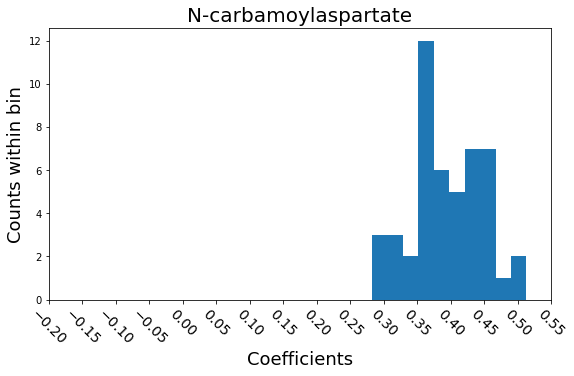

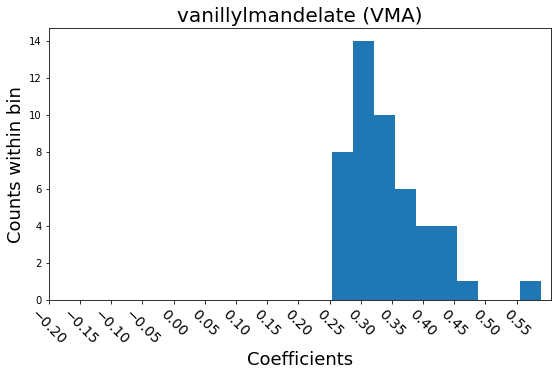

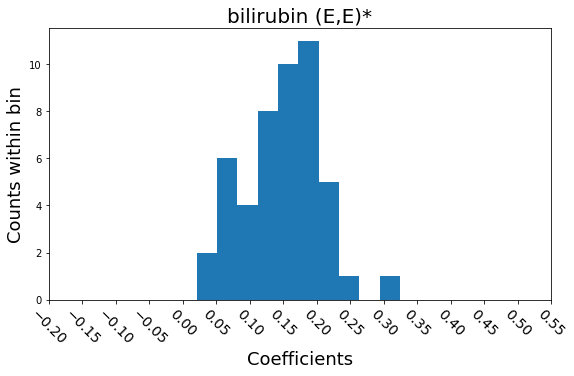

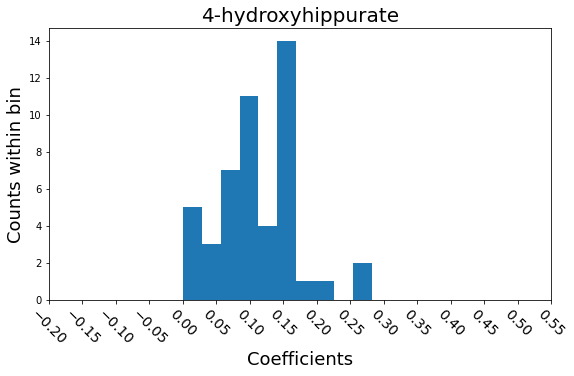

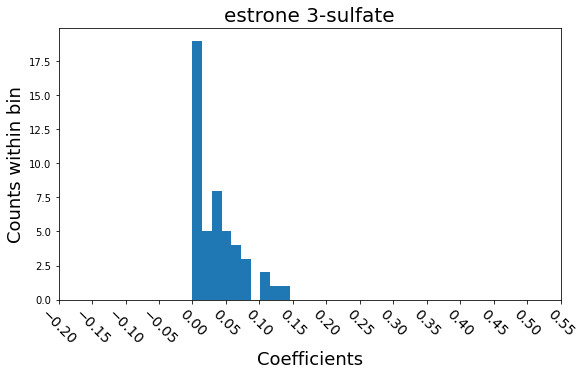

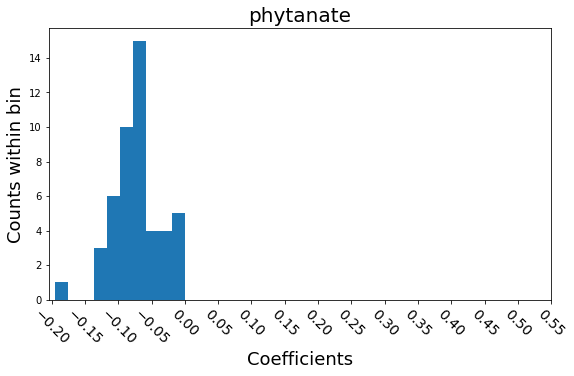

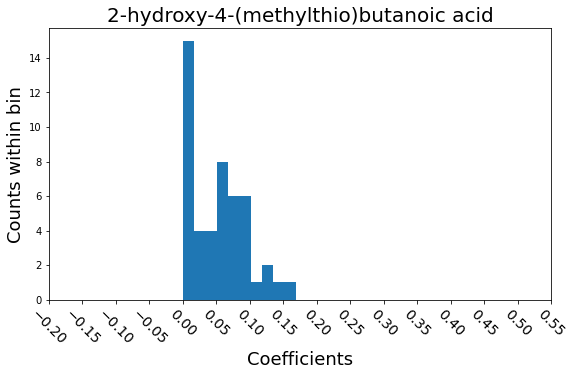

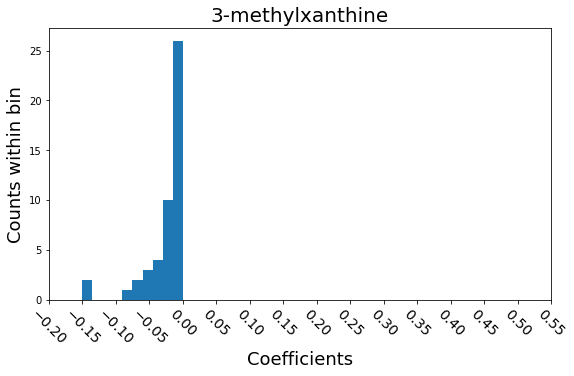

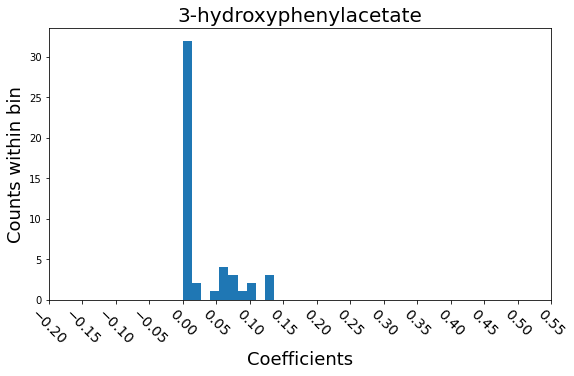

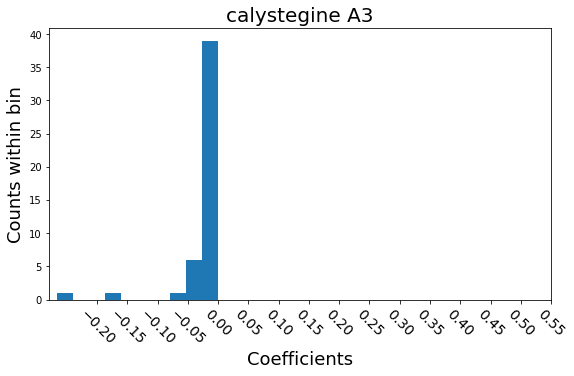

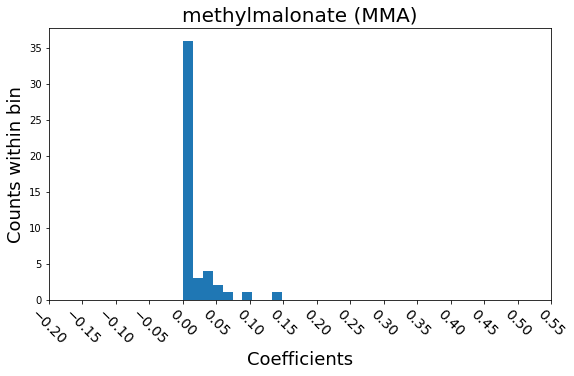

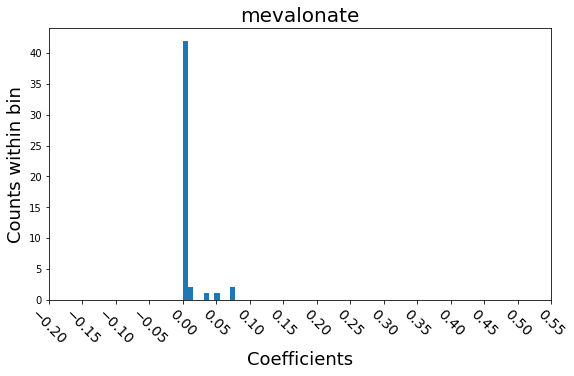

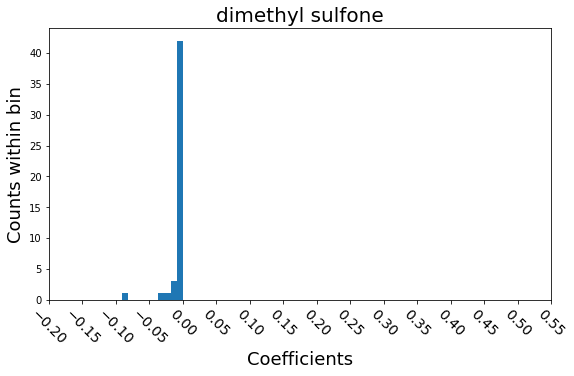

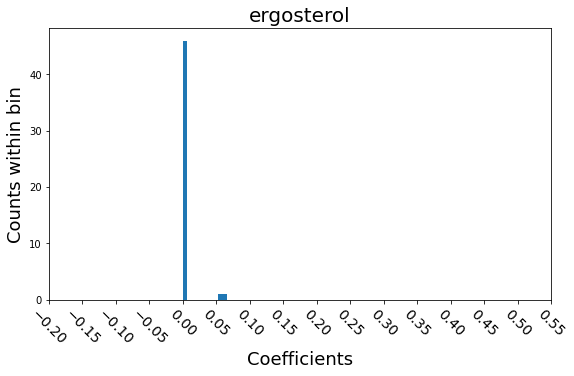

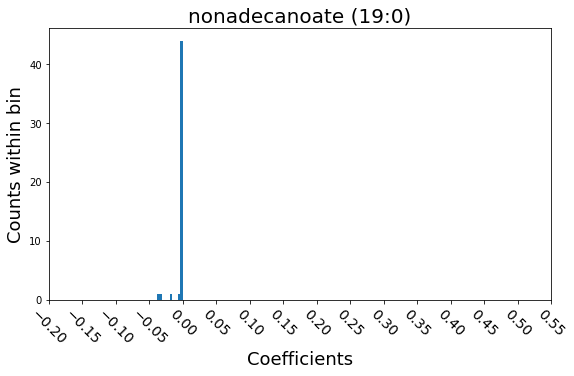

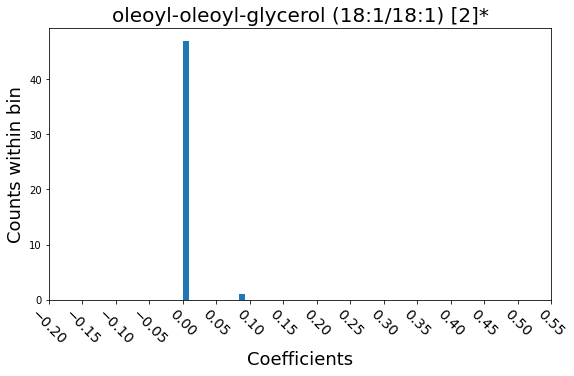

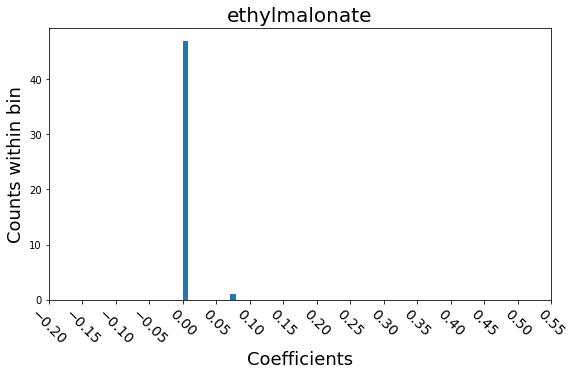

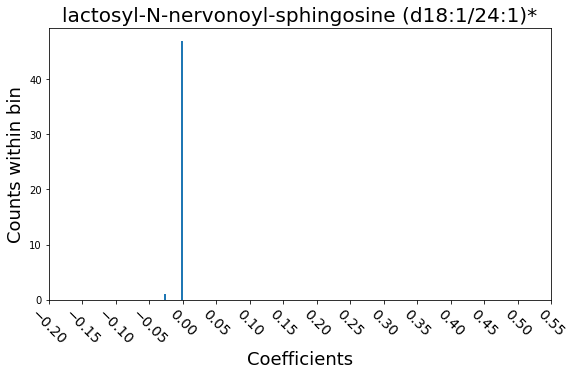

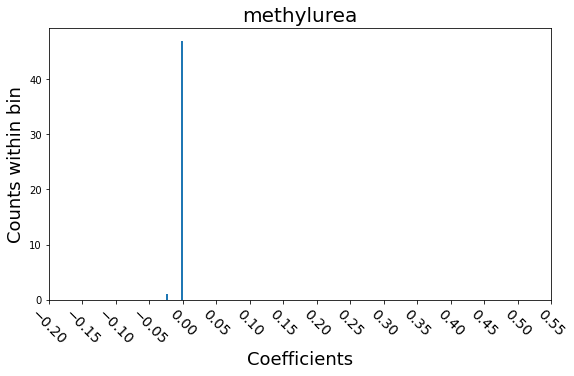

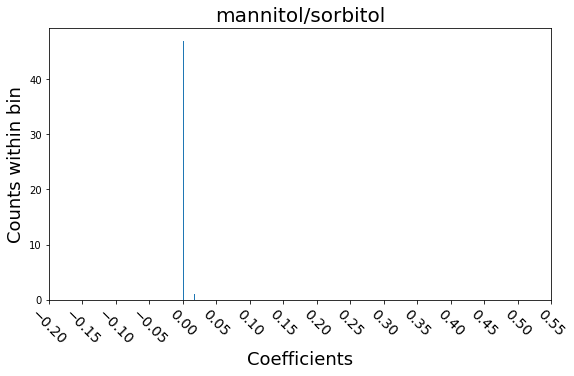

In [156]:
coefs_to_plot = med_dict['coef'][:,ix_tot]
for i in range(20):
    plt.figure(figsize = (9,5))
    plt.hist(coefs_to_plot[:,i])
    plt.title(coef_names[ix_tot][i], fontsize = 20)
    plt.xticks(np.arange(-.2,.6,0.05), fontsize = 14, rotation = -45)
    plt.xlabel('Coefficients', fontsize = 18)
    plt.ylabel('Counts within bin', fontsize = 18)
    plt.show()
    